In [291]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats import weightstats as statmodel
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random as rd
import os

In [527]:
df = pd.read_csv('/home/josh/Documents/dsi/caps/cap1/data/epl_cleaned.csv')
df = df.iloc[:,1:]

In [537]:
df.head()

Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS  \
0  2000-08-19  Charlton       Man City   4.0   0.0   H   2.0   0.0   H  17.0   
1  2000-08-19   Chelsea       West Ham   4.0   2.0   H   1.0   0.0   H  17.0   
2  2000-08-19  Coventry  Middlesbrough   1.0   3.0   A   1.0   1.0   D   6.0   
3  2000-08-19     Derby    Southampton   2.0   2.0   D   1.0   2.0   A   6.0   
4  2000-08-19     Leeds        Everton   2.0   0.0   H   2.0   0.0   H  17.0   

   ...  AST   HC   AC    HF    AF   HY   AY   HR   AR          ref_name  
0  ...  4.0  6.0  6.0  13.0  12.0  1.0  2.0  0.0  0.0        Rob Harris  
1  ...  5.0  7.0  7.0  19.0  14.0  1.0  2.0  0.0  0.0     Graham Barber  
2  ...  9.0  8.0  4.0  15.0  21.0  5.0  3.0  1.0  0.0      Barry Knight  
3  ...  6.0  5.0  8.0  11.0  13.0  1.0  1.0  0.0  0.0       Andy D'Urso  
4  ...  6.0  6.0  4.0  21.0  20.0  1.0  3.0  0.0  0.0  Dermot Gallagher  

[5 rows x 22 columns]

In [528]:
working_df = df.copy()
working_df.tail(30)

Date          HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  \
7556  2020-08-07          Brighton       Liverpool   1.0   3.0    A   1.0   
7557  2020-09-07       Bournemouth       Tottenham   0.0   0.0    D   0.0   
7558  2020-09-07           Everton     Southampton   1.0   1.0    D   1.0   
7559  2020-09-07       Aston Villa      Man United   0.0   3.0    A   0.0   
7560  2020-11-07           Norwich        West Ham   0.0   4.0    A   0.0   
7561  2020-11-07           Watford       Newcastle   2.0   1.0    H   0.0   
7562  2020-11-07         Liverpool         Burnley   1.0   1.0    D   1.0   
7563  2020-11-07  Sheffield United         Chelsea   3.0   0.0    H   2.0   
7564  2020-11-07          Brighton        Man City   0.0   5.0    A   0.0   
7565  2020-12-07            Wolves         Everton   3.0   0.0    H   1.0   
7566  2020-12-07       Aston Villa  Crystal Palace   2.0   0.0    H   1.0   
7567  2020-12-07         Tottenham         Arsenal   2.0   1.0    H   1.0   
7568  2020-12-07       Bournemouth       Leicester   4.0   1.0    H   0.0   
7569  2020-07-13        Man United     Southampton   2.0   2.0    D   2.0   
7570         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7571         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7572         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7573         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7574         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7575         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7576         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7577         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7578         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7579         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7580         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7581         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7582         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7583         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7584         NaN               NaN             NaN   NaN   NaN  NaN   NaN   
7585         NaN               NaN             NaN   NaN   NaN  NaN   NaN   

      HTAG  HTR    HS  ...  AST    HC    AC    HF    AF   HY   AY   HR   AR  \
7556   2.0    A  12.0  ...  8.0   6.0  10.0   7.0  15.0  1.0  4.0  0.0  0.0   
7557   0.0    D   9.0  ...  0.0   8.0  12.0  11.0  14.0  3.0  2.0  0.0  0.0   
7558   1.0    D  11.0  ...  4.0   3.0   5.0  13.0  14.0  3.0  3.0  0.0  0.0   
7559   2.0    A   9.0  ...  6.0   3.0   5.0   7.0  13.0  2.0  3.0  0.0  0.0   
7560   2.0    A  11.0  ...  7.0   1.0   6.0   9.0   8.0  1.0  0.0  0.0  0.0   
7561   1.0    A  17.0  ...  4.0   2.0   4.0  23.0  15.0  1.0  4.0  0.0  0.0   
7562   0.0    H  23.0  ...  2.0  12.0   6.0   7.0   4.0  1.0  2.0  0.0  0.0   
7563   0.0    H   9.0  ...  4.0   4.0   6.0   8.0   6.0  1.0  0.0  0.0  0.0   
7564   2.0    A   3.0  ...  8.0   2.0   7.0   7.0   3.0  1.0  0.0  0.0  0.0   
7565   0.0    H  14.0  ...  2.0   5.0   2.0   9.0   9.0  0.0  2.0  0.0  0.0   
7566   0.0    H  12.0  ...  5.0   5.0   1.0  21.0  21.0  2.0  4.0  0.0  1.0   
7567   1.0    D  15.0  ...  4.0   6.0   5.0  16.0  11.0  5.0  3.0  0.0  0.0   
7568   1.0    A  10.0  ...  5.0   2.0   6.0  11.0  12.0  2.0  1.0  0.0  1.0   
7569   1.0    H   8.0  ...  5.0   4.0   6.0  14.0  15.0  1.0  3.0  0.0  0.0   
7570   NaN  NaN   NaN  ...  NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
7571   NaN  NaN   NaN  ...  NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
7572   NaN  NaN   NaN  ...  NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
7573   NaN  NaN   NaN  ...  NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
7574   NaN  NaN   NaN  ...  NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
7575   NaN  NaN   NaN  ...  NaN   NaN   NaN 

In [529]:
working_df.dropna(axis=0,how='all',inplace=True)
working_df.tail()

Date     HomeTeam     AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  \
7567  2020-12-07    Tottenham      Arsenal   2.0   1.0    H   1.0   1.0    D   
7568  2020-12-07  Bournemouth    Leicester   4.0   1.0    H   0.0   1.0    A   
7569  2020-07-13   Man United  Southampton   2.0   2.0    D   2.0   1.0    H   
7570         NaN          NaN          NaN   NaN   NaN  NaN   NaN   NaN  NaN   
7585         NaN          NaN          NaN   NaN   NaN  NaN   NaN   NaN  NaN   

        HS  ...  AST   HC   AC    HF    AF   HY   AY   HR   AR        ref_name  
7567  15.0  ...  4.0  6.0  5.0  16.0  11.0  5.0  3.0  0.0  0.0  Michael Oliver  
7568  10.0  ...  5.0  2.0  6.0  11.0  12.0  2.0  1.0  0.0  1.0  Stuart Attwell  
7569   8.0  ...  5.0  4.0  6.0  14.0  15.0  1.0  3.0  0.0  0.0  Chris Kavanagh  
7570   NaN  ...  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN     Peter Jones  
7585   NaN  ...  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  Anthony Taylor  

[5 rows x 22 columns]

In [530]:
working_df.drop([7570,7585],axis=0,inplace=True)
working_df.tail()

Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
7565  2020-12-07       Wolves         Everton   3.0   0.0   H   1.0   0.0   H   
7566  2020-12-07  Aston Villa  Crystal Palace   2.0   0.0   H   1.0   0.0   H   
7567  2020-12-07    Tottenham         Arsenal   2.0   1.0   H   1.0   1.0   D   
7568  2020-12-07  Bournemouth       Leicester   4.0   1.0   H   0.0   1.0   A   
7569  2020-07-13   Man United     Southampton   2.0   2.0   D   2.0   1.0   H   

        HS  ...  AST   HC   AC    HF    AF   HY   AY   HR   AR  \
7565  14.0  ...  2.0  5.0  2.0   9.0   9.0  0.0  2.0  0.0  0.0   
7566  12.0  ...  5.0  5.0  1.0  21.0  21.0  2.0  4.0  0.0  1.0   
7567  15.0  ...  4.0  6.0  5.0  16.0  11.0  5.0  3.0  0.0  0.0   
7568  10.0  ...  5.0  2.0  6.0  11.0  12.0  2.0  1.0  0.0  1.0   
7569   8.0  ...  5.0  4.0  6.0  14.0  15.0  1.0  3.0  0.0  0.0   

             ref_name  
7565   Anthony Taylor  
7566  Martin Atkinson  
7567   Michael Oliver  
7568   Stuart Attwell  
7569   Chris Kavanagh  

[5 rows x 22 columns]

In [531]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7570 entries, 0 to 7569
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7570 non-null   object 
 1   HomeTeam  7570 non-null   object 
 2   AwayTeam  7570 non-null   object 
 3   FTHG      7570 non-null   float64
 4   FTAG      7570 non-null   float64
 5   FTR       7570 non-null   object 
 6   HTHG      7570 non-null   float64
 7   HTAG      7570 non-null   float64
 8   HTR       7570 non-null   object 
 9   HS        7570 non-null   float64
 10  AS        7570 non-null   float64
 11  HST       7570 non-null   float64
 12  AST       7570 non-null   float64
 13  HC        7570 non-null   float64
 14  AC        7570 non-null   float64
 15  HF        7570 non-null   float64
 16  AF        7570 non-null   float64
 17  HY        7570 non-null   float64
 18  AY        7570 non-null   float64
 19  HR        7570 non-null   float64
 20  AR        7570 non-null   floa

In [532]:
working_df.Date

0       2000-08-19
1       2000-08-19
2       2000-08-19
3       2000-08-19
4       2000-08-19
           ...    
7565    2020-12-07
7566    2020-12-07
7567    2020-12-07
7568    2020-12-07
7569    2020-07-13
Name: Date, Length: 7570, dtype: object

In [533]:
working_df.HR

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
7565    0.0
7566    0.0
7567    0.0
7568    0.0
7569    0.0
Name: HR, Length: 7570, dtype: float64

In [534]:
working_df.Date = pd.to_datetime(working_df.Date)
working_df.Date

0      2000-08-19
1      2000-08-19
2      2000-08-19
3      2000-08-19
4      2000-08-19
          ...    
7565   2020-12-07
7566   2020-12-07
7567   2020-12-07
7568   2020-12-07
7569   2020-07-13
Name: Date, Length: 7570, dtype: datetime64[ns]

In [536]:
working_df[(working_df.Date.dt.year == 2011) & ((working_df.Date.dt.month == 8)| (working_df.Date.dt.month == 7))]

Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
4086 2011-07-03    Blackpool      Chelsea   1.0   3.0   A   0.0   1.0   A   
4149 2011-07-05  Aston Villa        Wigan   1.0   1.0   D   1.0   1.0   D   
4150 2011-07-05       Bolton   Sunderland   1.0   2.0   A   0.0   1.0   A   
4151 2011-07-05      Everton     Man City   2.0   1.0   H   0.0   1.0   A   
4152 2011-07-05    Newcastle   Birmingham   2.0   1.0   H   2.0   1.0   H   
4153 2011-07-05    Tottenham    Blackpool   1.0   1.0   D   0.0   0.0   D   
4154 2011-07-05     West Ham    Blackburn   1.0   1.0   D   0.0   1.0   A   
4155 2011-08-05   Man United      Chelsea   2.0   1.0   H   2.0   0.0   H   
4156 2011-08-05        Stoke      Arsenal   3.0   1.0   H   2.0   0.0   H   
4157 2011-08-05       Wolves    West Brom   3.0   1.0   H   2.0   0.0   H   
4180 2011-08-13    Blackburn       Wolves   1.0   2.0   A   1.0   1.0   D   
4181 2011-08-13       Fulham  Aston Villa   0.0   0.0   D   0.0   0.0   D   
4182 2011-08-13    Liverpool   Sunderland   1.0   1.0   D   1.0   0.0   H   
4183 2011-08-13    Newcastle      Arsenal   0.0   0.0   D   0.0   0.0   D   
4184 2011-08-13          QPR       Bolton   0.0   4.0   A   0.0   1.0   A   
4185 2011-08-13        Wigan      Norwich   1.0   1.0   D   1.0   1.0   D   
4186 2011-08-14        Stoke      Chelsea   0.0   0.0   D   0.0   0.0   D   
4187 2011-08-14    West Brom   Man United   1.0   2.0   A   1.0   1.0   D   
4188 2011-08-15     Man City      Swansea   4.0   0.0   H   0.0   0.0   D   
4189 2011-08-20      Arsenal    Liverpool   0.0   2.0   A   0.0   0.0   D   
4190 2011-08-20  Aston Villa    Blackburn   3.0   1.0   H   2.0   0.0   H   
4191 2011-08-20      Chelsea    West Brom   2.0   1.0   H   0.0   1.0   A   
4192 2011-08-20      Everton          QPR   0.0   1.0   A   0.0   1.0   A   
4193 2011-08-20   Sunderland    Newcastle   0.0   1.0   A   0.0   0.0   D   
4194 2011-08-20      Swansea        Wigan   0.0   0.0   D   0.0   0.0   D   
4195 2011-08-21       Bolton     Man City   2.0   3.0   A   1.0   2.0   A   
4196 2011-08-21      Norwich        Stoke   1.0   1.0   D   1.0   0.0   H   
4197 2011-08-21       Wolves       Fulham   2.0   0.0   H   2.0   0.0   H   
4198 2011-08-22   Man United    Tottenham   3.0   0.0   H   0.0   0.0   D   
4199 2011-08-27  Aston Villa       Wolves   0.0   0.0   D   0.0   0.0   D   
4200 2011-08-27    Blackburn      Everton   0.0   1.0   A   0.0   0.0   D   
4201 2011-08-27      Chelsea      Norwich   3.0   1.0   H   1.0   0.0   H   
4202 2011-08-27    Liverpool       Bolton   3.0   1.0   H   1.0   0.0   H   
4203 2011-08-27      Swansea   Sunderland   0.0   0.0   D   0.0   0.0   D   
4204 2011-08-27        Wigan          QPR   2.0   0.0   H   1.0   0.0   H   
4205 2011-08-28   Man United      Arsenal   8.0   2.0   H   3.0   1.0   H   
4206 2011-08-28    Newcastle       Fulham   2.0   1.0   H   0.0   0.0   D   
4207 2011-08-28    Tottenham     Man City   1.0   5.0   A   0.0   2.0   A   
4208 2011-08-28    West Brom        Stoke   0.0   1.0   A   0.0   0.0   D   

        HS  ...   AST    HC    AC    HF    AF   HY   AY   HR   AR  \
4086  14.0  ...  11.0   3.0  13.0   5.0   8.0  0.0  0.0  0.0  0.0   
4149  10.0  ...   4.0   2.0   5.0   6.0  11.0  2.0  0.0  0.0  0.0   
4150  17.0  ...   6.0   5.0   5.0  14.0  10.0  1.0  0.0  0.0  0.0   
4151  10.0  ...   7.0  11.0   6.0  13.0  15.0  4.0  2.0  0.0  0.0   
4152  19.0  ...   2.0   8.0   2.0  10.0  12.0  1.0  4.0  0.0  1.0   
4153  20.0  ...   7.0   7.0   6.0   5.0  13.0  3.0  2.0  0.0  0.0   
4154  24.0  ...   4.0   7.0   3.0   7.0  14.0  3.0  0.0  0.0  0.0   
4155  13.0  ...  11.0   7.0   2.0  12.0  14.0  2.0  4.0  0.0  0.0   
4156  12.0  ...   5.0   2.0   5.0   7.0  10.0  1.0  2.0  0.0  0.0   
4157  14.0  ...   6.0   8.0   4.0   9.0   7.0  3.0  1.0  0.0  0.0   
4180  16.0  ...   4.0  12.0   6.0  14.0  10.0  4.0  2.0  0.0  0.0   
4181  13.0  ...   1.0   2.0   3.0  10.0  18.0  2.0  4.0  0.0  0.0   
4182  11.0  ...   6.0   6.0   3.0

In [545]:
start = '2011-08-01'
end = '2012-07-31'
mask = (working_df.Date > start) & (working_df.Date < end)
testdf = working_df.loc[mask]
testdf.tail(30)

Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
4619 2012-06-10      Chelsea      Norwich   4.0   1.0   H   3.0   1.0   H   
4620 2012-06-10     Man City   Sunderland   3.0   0.0   H   1.0   0.0   H   
4621 2012-06-10      Swansea      Reading   2.0   2.0   D   0.0   2.0   A   
4622 2012-06-10    West Brom          QPR   3.0   2.0   H   2.0   1.0   H   
4623 2012-06-10     West Ham      Arsenal   1.0   3.0   A   1.0   1.0   D   
4624 2012-06-10        Wigan      Everton   2.0   2.0   D   2.0   1.0   H   
4625 2012-07-10    Liverpool        Stoke   0.0   0.0   D   0.0   0.0   D   
4626 2012-07-10    Newcastle   Man United   0.0   3.0   A   0.0   2.0   A   
4627 2012-07-10  Southampton       Fulham   2.0   2.0   D   1.0   0.0   H   
4628 2012-07-10    Tottenham  Aston Villa   2.0   0.0   H   0.0   0.0   D   
4649 2012-03-11       Fulham      Everton   2.0   2.0   D   1.0   0.0   H   
4650 2012-03-11   Man United      Arsenal   2.0   1.0   H   1.0   0.0   H   
4651 2012-03-11      Norwich        Stoke   1.0   0.0   H   1.0   0.0   H   
4652 2012-03-11   Sunderland  Aston Villa   0.0   1.0   A   0.0   0.0   D   
4653 2012-03-11      Swansea      Chelsea   1.0   1.0   D   0.0   0.0   D   
4654 2012-03-11    Tottenham        Wigan   0.0   1.0   A   0.0   0.0   D   
4655 2012-03-11     West Ham     Man City   0.0   0.0   D   0.0   0.0   D   
4656 2012-04-11    Liverpool    Newcastle   1.0   1.0   D   0.0   1.0   A   
4657 2012-04-11          QPR      Reading   1.0   1.0   D   0.0   1.0   A   
4658 2012-05-11    West Brom  Southampton   2.0   0.0   H   1.0   0.0   H   
4699 2012-01-12      Arsenal      Swansea   0.0   2.0   A   0.0   0.0   D   
4700 2012-01-12       Fulham    Tottenham   0.0   3.0   A   0.0   0.0   D   
4701 2012-01-12    Liverpool  Southampton   1.0   0.0   H   1.0   0.0   H   
4702 2012-01-12     Man City      Everton   1.0   1.0   D   1.0   1.0   D   
4703 2012-01-12          QPR  Aston Villa   1.0   1.0   D   1.0   1.0   D   
4704 2012-01-12      Reading   Man United   3.0   4.0   A   3.0   4.0   A   
4705 2012-01-12    West Brom        Stoke   0.0   1.0   A   0.0   0.0   D   
4706 2012-01-12     West Ham      Chelsea   3.0   1.0   H   0.0   1.0   A   
4707 2012-02-12      Norwich   Sunderland   2.0   1.0   H   2.0   1.0   H   
4708 2012-03-12    Newcastle        Wigan   3.0   0.0   H   2.0   0.0   H   

        HS  ...   AST    HC    AC    HF    AF   HY   AY   HR   AR  \
4619  20.0  ...   4.0  10.0   2.0   7.0   1.0  0.0  0.0  0.0  0.0   
4620  26.0  ...   6.0  15.0   4.0  10.0  10.0  0.0  3.0  0.0  0.0   
4621  25.0  ...   6.0  11.0   3.0   8.0  11.0  1.0  3.0  0.0  0.0   
4622  13.0  ...   6.0   2.0   5.0  16.0  12.0  2.0  2.0  0.0  0.0   
4623   7.0  ...  14.0   4.0  16.0  12.0   7.0  3.0  2.0  0.0  0.0   
4624  10.0  ...  11.0   7.0   6.0  14.0  14.0  2.0  5.0  0.0  0.0   
4625  16.0  ...   3.0   5.0   5.0   9.0  16.0  0.0  6.0  0.0  0.0   
4626  13.0  ...   9.0   8.0   6.0  15.0  12.0  4.0  4.0  0.0  0.0   
4627  13.0  ...   5.0   8.0   8.0  13.0   5.0  4.0  0.0  0.0  0.0   
4628  23.0  ...   5.0   8.0   0.0   7.0  10.0  1.0  3.0  0.0  0.0   
4649   8.0  ...  15.0   5.0   9.0  16.0   9.0  3.0  1.0  0.0  0.0   
4650  11.0  ...   3.0   6.0   1.0  13.0  13.0  5.0  3.0  0.0  1.0   
4651  12.0  ...   3.0   9.0   1.0  11.0  13.0  1.0  5.0  0.0  0.0   
4652  11.0  ...   6.0   6.0   7.0  10.0  17.0  2.0  3.0  0.0  0.0   
4653   9.0  ...   7.0   8.0   6.0  12.0   9.0  4.0  1.0  0.0  0.0   
4654  13.0  ...   4.0   9.0   3.0  10.0  11.0  1.0  1.0  0.0  0.0   
4655   6.0  ...   8.0   3.0   7.0  11.0  12.0  3.0  0.0  0.0  0.0   
4656  20.0  ...   3.0  14.0   3.0  10.0  13.0  0.0  1.0  0.0  1.0   
4657  23.0  ...   8.0   8.0   8.0  11.0  15.0  0.0  2.0  0.0  0.0   
4658  16.0  ...   5.0   8.0   6.0   6.0  12.0  1.0  0.0  0.0  0.0   
4699  10.0  ...  10.0   8.0   5.0  11.0   9.0  1.0  0.0  0.0  0.0   
4700   8.0  ...   6.0   2.0   1.0  10.0   8.0  0.0  2.0  0.0  0.0   
4701  24.0  ...   4.0  10.0   4.0  1

In [552]:
def yearlyDf(df,yr):
    for x in yr:
        start = str(x)+'-08-01'
        end = str(x+1)+'-07-31'
        mask = (df.Date > start) & (df.Date < end)
        new_df = df.loc[mask]
        new_df.to_csv(f'/home/josh/Documents/dsi/caps/cap1/data/{x}/df_{x}.csv')

In [553]:
yearlyDf(working_df,range(2000,2021))

In [554]:
def create_df(inputfile):
    n = pd.read_csv(inputfile)
    return n.iloc[:,1:]

In [555]:
df2000 = create_df('../data/2000/df_2000.csv')
df2000.head()

Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS  \
0  2000-08-19  Charlton       Man City   4.0   0.0   H   2.0   0.0   H  17.0   
1  2000-08-19   Chelsea       West Ham   4.0   2.0   H   1.0   0.0   H  17.0   
2  2000-08-19  Coventry  Middlesbrough   1.0   3.0   A   1.0   1.0   D   6.0   
3  2000-08-19     Derby    Southampton   2.0   2.0   D   1.0   2.0   A   6.0   
4  2000-08-19     Leeds        Everton   2.0   0.0   H   2.0   0.0   H  17.0   

   ...  AST   HC   AC    HF    AF   HY   AY   HR   AR          ref_name  
0  ...  4.0  6.0  6.0  13.0  12.0  1.0  2.0  0.0  0.0        Rob Harris  
1  ...  5.0  7.0  7.0  19.0  14.0  1.0  2.0  0.0  0.0     Graham Barber  
2  ...  9.0  8.0  4.0  15.0  21.0  5.0  3.0  1.0  0.0      Barry Knight  
3  ...  6.0  5.0  8.0  11.0  13.0  1.0  1.0  0.0  0.0       Andy D'Urso  
4  ...  6.0  6.0  4.0  21.0  20.0  1.0  3.0  0.0  0.0  Dermot Gallagher  

[5 rows x 22 columns]

In [556]:
def create_ref_df(df):
    ref_df = df.groupby('ref_name').sum()
    ref_df['Games_reffed'] = df.ref_name.value_counts()
    ref_df.reset_index(inplace=True)
    return ref_df

In [562]:
refs2000 = create_ref_df(df2000)
refs2000.head()

ref_name  FTHG  FTAG  HTHG  HTAG     HS     AS    HST    AST     HC  \
0    Alan Wiley  18.0  31.0  10.0  16.0  280.0  256.0  112.0  117.0  150.0   
1   Andy D'Urso  38.0  19.0  14.0  13.0  274.0  170.0  121.0   87.0  122.0   
2     Andy Hall   3.0   0.0   0.0   0.0   13.0    8.0    8.0    4.0    3.0   
3  Barry Knight  25.0  11.0  11.0   6.0  184.0  170.0   96.0   73.0   92.0   
4  Clive Wilkes  12.0   7.0   5.0   3.0  113.0   82.0   51.0   39.0   60.0   

      AC     HF     AF    HY    AY   HR   AR  Games_reffed  
0  103.0  299.0  314.0  33.0  32.0  2.0  0.0            23  
1   88.0  229.0  253.0  28.0  33.0  3.0  3.0            19  
2    5.0   17.0   15.0   2.0   1.0  0.0  1.0             1  
3   72.0  202.0  234.0  27.0  35.0  4.0  2.0            16  
4   40.0  119.0  120.0  12.0  20.0  0.0  0.0             9

In [558]:
tot_teams2000 = df2000.HomeTeam.unique()
tot_teams2000

array(['Charlton', 'Chelsea', 'Coventry', 'Derby', 'Leeds', 'Leicester',
       'Liverpool', 'Sunderland', 'Tottenham', 'Man United', 'Arsenal',
       'Bradford', 'Ipswich', 'Middlesbrough', 'Everton', 'Man City',
       'Newcastle', 'Southampton', 'West Ham', 'Aston Villa', 'Bolton',
       'Blackburn', 'Fulham'], dtype=object)

In [559]:
df2000.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'ref_name'],
      dtype='object')

In [560]:
refs2000_list = df2000.ref_name.unique()

In [163]:
working_df.describe()

FTHG         FTAG         HTHG         HTAG           HS  \
count  7570.000000  7570.000000  7570.000000  7570.000000  7570.000000   
mean      1.529194     1.139498     0.681638     0.498679    13.532232   
std       1.295951     1.131626     0.830673     0.715095     5.227328   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     0.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     9.000000     5.000000     5.000000    43.000000   

                AS          HST          AST           HC           AC  \
count  7570.000000  7570.000000  7570.000000  7570.000000  7570.000000   
mean     10.560106     6.265786     4.831572     6.132629     4.786790   
std       4.519729     3.350870     2.815887     3.100229     2.727843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     4.000000     3.000000     4.000000     3.000000   
50%      10.000000     6.000000     4.000000     6.000000     4.000000   
75%      13.000000     8.000000     6.000000     8.000000     6.000000   
max      30.000000    24.000000    20.000000    20.000000    19.000000   

                HF           AF           HY           AY           HR  \
count  7570.000000  7570.000000  7570.000000  7570.000000  7570.000000   
mean     11.438309    12.004888     1.402906     1.761691     0.063937   
std       3.807942     3.966547     1.188482     1.272393     0.255745   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       9.000000     9.000000     0.000000     1.000000     0.000000   
50%      11.000000    12.000000     1.000000     2.000000     0.000000   
75%      14.000000    14.000000     2.000000     3.000000     0.000000   
max      33.000000    29.000000     7.000000     9.000000     3.000000   

                AR  
count  7570.000000  
mean      0.091810  
std       0.300436  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       2.000000

In [164]:
totyrs_totyell = working_df.HY.sum() + working_df.AY.sum()
totyrs_totyell

23956.0

In [165]:
totyrs_totred = working_df.HR.sum() + working_df.AR.sum()
totyrs_totred

1179.0

In [166]:
totyrs_totgames = len(working_df.Date)
totyrs_totgames

7570

In [167]:
totyrs_yell_per_game = totyrs_totyell / totyrs_totgames
totyrs_yell_per_game 

3.1645970937912815

In [168]:
totyrs_red_per_game = totyrs_totred / totyrs_totgames
totyrs_red_per_game 

0.1557463672391017

In [169]:
totrefs = create_ref_df(working_df)
totrefs.head()

ref_name   FTHG   FTAG   HTHG   HTAG      HS      AS     HST     AST  \
0      Alan Wiley  370.0  296.0  162.0  133.0  3264.0  2561.0  1664.0  1315.0   
1  Andre Marriner  525.0  428.0  241.0  197.0  4635.0  3710.0  2034.0  1642.0   
2     Andy D'Urso  151.0  109.0   64.0   50.0  1333.0   930.0   659.0   475.0   
3       Andy Hall    3.0    0.0    0.0    0.0    13.0     8.0     8.0     4.0   
4     Andy Madley   19.0   17.0    7.0    5.0   182.0   140.0    55.0    49.0   

       HC      AC      HF      AF     HY     AY    HR    AR  Games_reffed  
0  1499.0  1183.0  3277.0  3358.0  351.0  417.0  11.0  21.0           253  
1  1978.0  1599.0  3477.0  3539.0  468.0  584.0  20.0  36.0           332  
2   648.0   471.0  1189.0  1329.0  127.0  184.0  13.0  12.0            99  
3     3.0     5.0    17.0    15.0    2.0    1.0   0.0   1.0             1  
4    93.0    58.0   141.0   136.0   18.0   22.0   1.0   0.0            13

In [170]:
total_refs_used_totyrs = len(totrefs.ref_name)
total_refs_used_totyrs

63

In [499]:
def ScatterPlot(x,y,title,xlabel,ylabel,dotlabel,card_color=None):
    plt.style.use('seaborn-dark')
    save_title = title.replace(' ','_')
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111)
    plt.rc('font',size=16)
    
    if card_color == 'Yellow' or card_color == 'yellow':
        dotcolor = 'darkgoldenrod'
        diag = 'gold'
    elif card_color == 'Red' or card_color == 'red':
        dotcolor = 'firebrick'
        diag = 'tomato'
    else:
        dotcolor = (rd.random(),rd.random(),rd.random())
        diag = (rd.random(),rd.random(),rd.random())
    
    ax.scatter(x,y,color=dotcolor,label=dotlabel)
    ax.plot([0,x.max()],[0,y.max()],color=diag, linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'/home/josh/Documents/dsi/caps/cap1/images/{save_title}.png')

    plt.show()

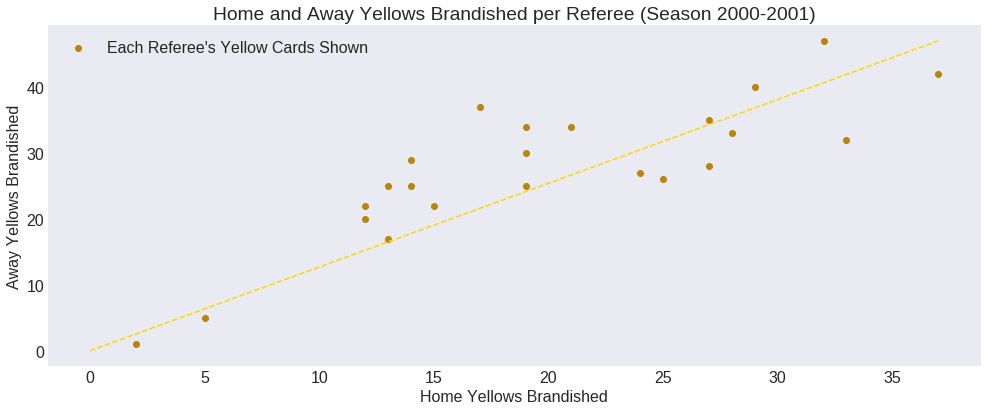

In [563]:
tit = 'Home and Away Yellows Brandished per Referee (Season 2000-2001)'
dlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2000.HY,refs2000.AY,tit,'Home Yellows Brandished','Away Yellows Brandished',dlabel,'yellow')

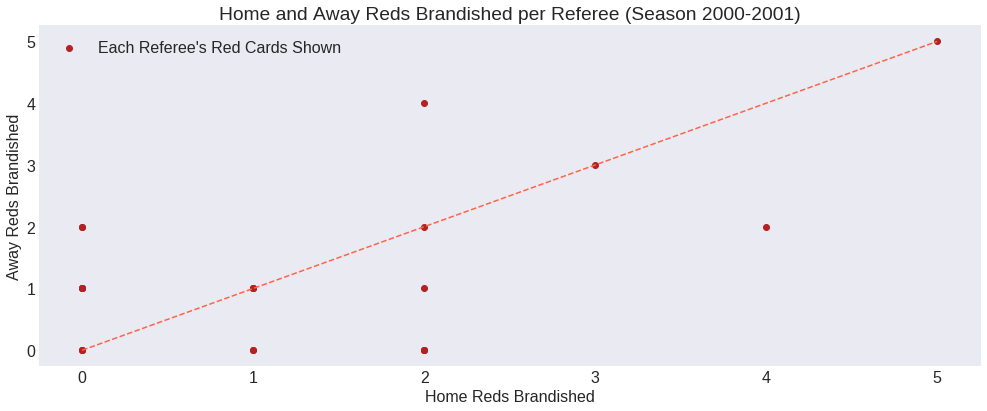

In [564]:
tit = 'Home and Away Reds Brandished per Referee (Season 2000-2001)'
dlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2000.HR,refs2000.AR,tit,'Home Reds Brandished','Away Reds Brandished',dlabel,'red')

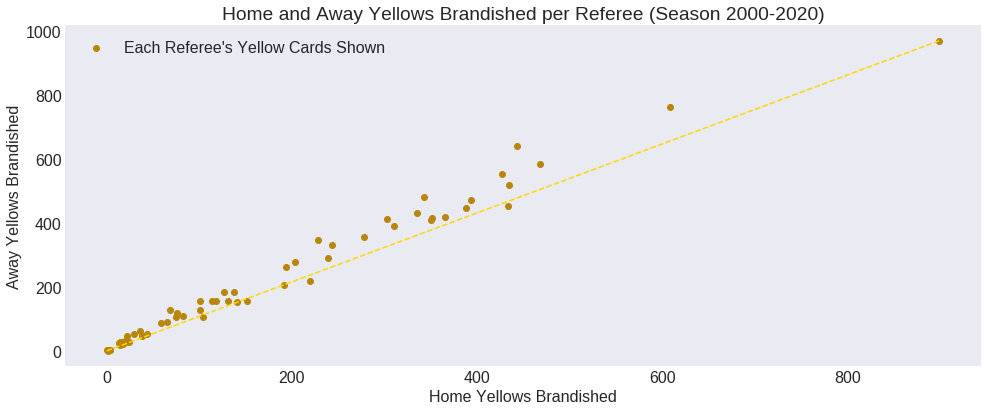

In [565]:
tit = 'Home and Away Yellows Brandished per Referee (Season 2000-2020)'
dlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(totrefs.HY,totrefs.AY,tit,'Home Yellows Brandished','Away Yellows Brandished',dlabel,'yellow')

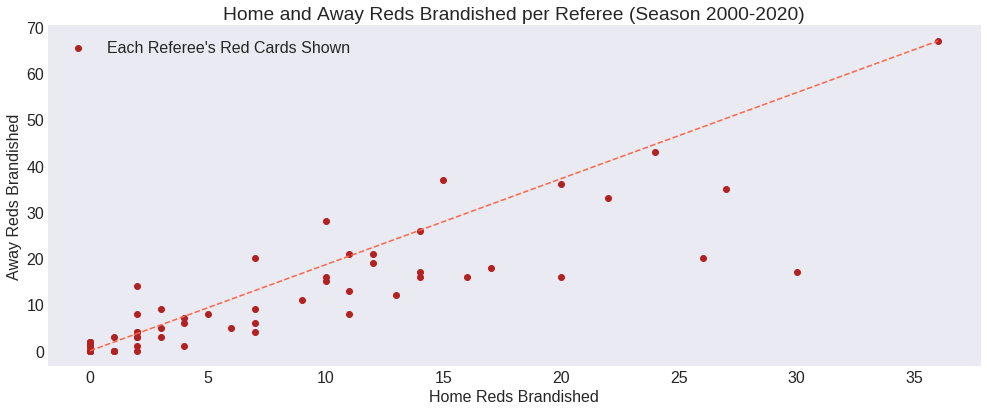

In [566]:
tit = 'Home and Away Reds Brandished per Referee (Season 2000-2020)'
dlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(totrefs.HR,totrefs.AR,tit,'Home Reds Brandished','Away Reds Brandished',dlabel,'red')

In [172]:
def BarGraphGrouped(labels,title,xlabel,ylabel,group1,group1_label,group2,group2_label,card_color=None):

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    
    save_title = title.replace(' ','_')
    
    barlabels = [x for x in labels]
    bar1 = [y for y in group1]
    bar2 = [z for z in group2]
    width_ = 0.4
    
    if card_color == 'Yellow' or card_color == 'yellow':
        color1, color2, edge = ('palegoldenrod','goldenrod','darkgoldenrod')
    elif card_color == 'Red' or card_color == 'red':
        color1, color2, edge = ('lightcoral','firebrick','maroon')
    else:
        color1, coloyscattit = 'Home and Away Yellows Brandished per Referee (Season 2003-r2, edge = ((rd.random(),rd.random(),rd.random()),(rd.random(),rd.random(),rd.random()),None)
        
    r1 = np.arange(len(bar1))
    r2 = [x+width_ for x in r1]
    ax.bar(r1,bar1,color=color1,width=width_,edgecolor=edge,label=group1_label)
    ax.bar(r2,bar2,color=color2,width=width_,label=group2_label)

    ax.set_xticks(r1)
    ax.set_xticklabels(barlabels,rotation=45,fontdict={'fontsize':9})
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(f'/home/josh/Documents/dsi/caps/cap1/images/{save_title}.jpeg',dpi=100)
    plt.show()

In [173]:
working_df.ref_name.value_counts()

Mike Dean          508
Martin Atkinson    409
Andre Marriner     332
Phil Dowd          306
Howard Webb        297
                  ... 
Iain Williamson      1
Robert Jones         1
Neil Yates           1
Oliver Langford      1
Tim Robinson         1
Name: ref_name, Length: 63, dtype: int64

In [174]:
avg_games_reffed = working_df.ref_name.value_counts().mean()
avg_games_reffed

120.15873015873017

In [38]:
totrefs[totrefs.ref_name == 'Howard Webb']

ref_name   FTHG   FTAG   HTHG   HTAG      HS      AS     HST     AST  \
20  Howard Webb  442.0  311.0  189.0  133.0  3922.0  3137.0  2042.0  1623.0   

        HC      AC      HF      AF     HY     AY    HR    AR  Games_reffed  
20  1826.0  1422.0  3510.0  3597.0  427.0  555.0  12.0  21.0           297

In [175]:
sorted_totrefs = totrefs.sort_values('Games_reffed',ascending=False)

In [176]:
top_refs = sorted_totrefs[sorted_totrefs['Games_reffed'] >= avg_games_reffed]

In [177]:
top_refs.head()

ref_name   FTHG   FTAG   HTHG   HTAG      HS      AS     HST  \
33        Mike Dean  785.0  592.0  353.0  257.0  7062.0  5403.0  3253.0   
30  Martin Atkinson  598.0  428.0  261.0  186.0  5697.0  4285.0  2465.0   
1    Andre Marriner  525.0  428.0  241.0  197.0  4635.0  3710.0  2034.0   
47        Phil Dowd  503.0  356.0  219.0  142.0  4145.0  3226.0  2140.0   
20      Howard Webb  442.0  311.0  189.0  133.0  3922.0  3137.0  2042.0   

       AST      HC      AC      HF      AF     HY     AY    HR    AR  \
33  2464.0  3160.0  2424.0  5750.0  5810.0  899.0  971.0  36.0  67.0   
30  1838.0  2462.0  1952.0  4429.0  4840.0  608.0  764.0  27.0  35.0   
1   1642.0  1978.0  1599.0  3477.0  3539.0  468.0  584.0  20.0  36.0   
47  1647.0  1960.0  1541.0  3731.0  4066.0  443.0  643.0  24.0  43.0   
20  1623.0  1826.0  1422.0  3510.0  3597.0  427.0  555.0  12.0  21.0   

    Games_reffed  
33           508  
30           409  
1            332  
47           306  
20           297

In [42]:
top_refs.describe()

FTHG        FTAG        HTHG        HTAG           HS  \
count   24.000000   24.000000   24.000000   24.000000    24.000000   
mean   380.000000  285.708333  169.875000  124.708333  3389.666667   
std    133.828898  100.201310   60.385942   44.346932  1205.574792   
min    192.000000  135.000000   88.000000   55.000000  1578.000000   
25%    297.750000  212.500000  134.000000   90.500000  2665.500000   
50%    364.000000  287.000000  163.000000  127.500000  3245.500000   
75%    439.000000  320.500000  196.250000  141.250000  3800.000000   
max    785.000000  592.000000  353.000000  257.000000  7062.000000   

                AS          HST          AST           HC           AC  \
count    24.000000    24.000000    24.000000    24.000000    24.000000   
mean   2669.333333  1576.875000  1229.000000  1518.375000  1195.416667   
std     938.634284   563.760534   436.459969   533.005001   425.666732   
min    1229.000000   720.000000   581.000000   731.000000   576.000000   
25%    1999.750000  1299.750000   965.250000  1249.250000   911.000000   
50%    2534.000000  1447.500000  1219.500000  1490.000000  1199.000000   
75%    3108.500000  1827.750000  1485.250000  1700.000000  1400.250000   
max    5403.000000  3253.000000  2464.000000  3160.000000  2424.000000   

                HF           AF          HY          AY         HR         AR  \
count    24.000000    24.000000   24.000000   24.000000  24.000000  24.000000   
mean   2822.458333  2946.166667  358.041667  443.750000  16.416667  23.541667   
std     969.071406   995.911846  157.242952  173.972824   7.689160  13.147918   
min    1337.000000  1425.000000  137.000000  184.000000   7.000000   4.000000   
25%    2281.250000  2474.000000  242.000000  343.500000  10.750000  16.000000   
50%    2847.500000  2960.500000  346.500000  418.500000  14.000000  19.500000   
75%    3271.750000  3338.500000  428.500000  491.000000  20.500000  29.250000   
max    5750.000000  5810.000000  899.000000  971.000000  36.000000  67.000000   

       Games_reffed  
count     24.000000  
mean     249.291667  
std       85.325708  
min      127.000000  
25%      197.500000  
50%      248.000000  
75%      280.250000  
max      508.000000

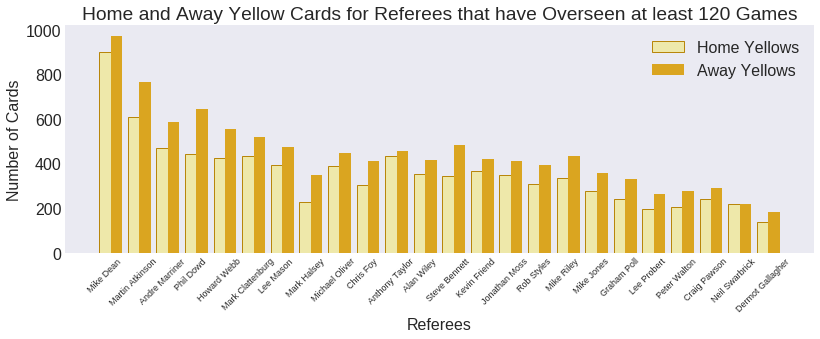

In [567]:
tit = 'Home and Away Yellow Cards for Referees that have Overseen at least 120 Games'
BarGraphGrouped(top_refs.ref_name,tit,'Referees','Number of Cards',top_refs.HY,'Home Yellows',top_refs.AY,'Away Yellows','yellow')

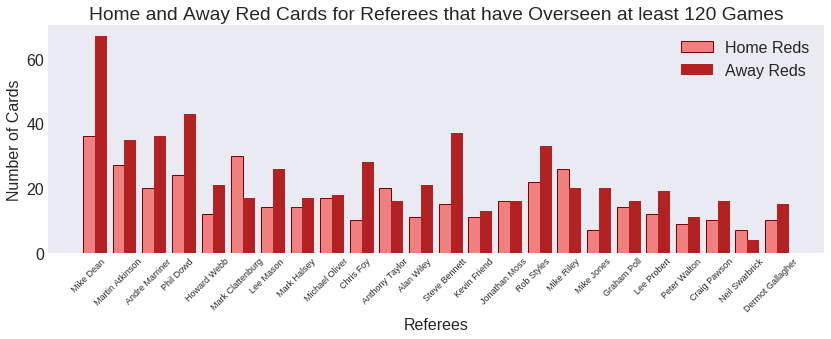

In [568]:
tit = 'Home and Away Red Cards for Referees that have Overseen at least 120 Games'
BarGraphGrouped(top_refs.ref_name,tit,'Referees','Number of Cards',top_refs.HR,'Home Reds',top_refs.AR,'Away Reds','red')

In [569]:
df2001 = create_df('../data/2001/df_2001.csv')
refs2001 = create_ref_df(df2001)

In [570]:
refs2001yscattit = 'Home and Away Yellows Brandished per Referee (Season 2003-

ref_name  FTHG  FTAG  HTHG  HTAG     HS     AS    HST    AST  \
0           Alan Wiley  28.0  27.0   6.0  12.0  245.0  168.0  109.0   73.0   
1          Andy D'Urso  35.0  32.0  15.0  13.0  334.0  234.0  160.0  125.0   
2         Barry Knight  10.0   5.0   1.0   4.0  104.0   73.0   41.0   36.0   
3            Chris Foy   7.0   4.0   1.0   3.0   65.0   41.0   34.0   22.0   
4         Clive Wilkes  12.0   8.0   6.0   3.0  157.0   90.0   63.0   47.0   
5        David Elleray  26.0  27.0  14.0  12.0  183.0  180.0  100.0   78.0   
6           David Pugh   5.0   3.0   3.0   2.0  113.0   54.0   40.0   25.0   
7     Dermot Gallagher  27.0  17.0  14.0   9.0  235.0  184.0  114.0   81.0   
8   Eddie Wolstenholme  19.0  15.0  12.0   7.0  161.0   87.0   91.0   41.0   
9        Graham Barber  24.0  30.0  11.0  10.0  219.0  211.0  113.0  103.0   
10         Graham Poll  38.0  34.0  17.0  10.0  295.0  220.0  137.0  111.0   
11         Jeff Winter  29.0  24.0  17.0   8.0  268.0  187.0  126.0   87.0   
12         Mark Halsey  32.0  22.0  14.0  11.0  255.0  181.0  113.0   95.0   
13        Matt Messias   5.0   2.0   2.0   1.0   67.0   56.0   35.0   28.0   
14           Mike Dean  15.0   8.0   5.0   4.0  139.0   99.0   64.0   35.0   
15          Mike Riley  28.0  21.0  15.0   9.0  247.0  203.0  125.0   92.0   
16         Neale Barry  24.0  23.0  10.0  10.0  213.0  176.0   98.0   86.0   
17          Neil Yates   0.0   0.0   0.0   0.0    9.0    4.0    2.0    2.0   
18         Paul Durkin  27.0  17.0  13.0   8.0  231.0  195.0  102.0   80.0   
19         Peter Jones  25.0  11.0  10.0   6.0  168.0  117.0   87.0   49.0   
20           Phil Dowd   9.0   5.0   6.0   3.0   60.0   52.0   33.0   26.0   
21          Rob Harris   1.0   0.0   0.0   0.0   17.0    5.0   10.0    3.0   
22          Rob Styles  26.0  28.0  15.0  14.0  223.0  195.0  106.0   89.0   
23       Steve Bennett  26.0  16.0  15.0   9.0  216.0  170.0  101.0   84.0   
24          Steve Dunn  30.0  25.0  13.0  11.0  234.0  181.0  114.0   79.0   
25        Uriah Rennie  32.0  20.0  17.0   9.0  196.0  146.0  103.0   68.0   

       HC     AC     HF     AF    HY    AY   HR   AR  Games_reffed  
0   132.0   68.0  266.0  267.0  28.0  34.0  1.0  1.0            18  
1   153.0  109.0  308.0  308.0  39.0  44.0  3.0  5.0            23  
2    66.0   37.0  131.0  144.0  13.0  21.0  1.0  1.0             9  
3    47.0   20.0   82.0   90.0   8.0  18.0  0.0  2.0             6  
4    89.0   48.0  153.0  185.0  13.0  23.0  1.0  2.0            12  
5   131.0   77.0  208.0  216.0  17.0  24.0  2.0  3.0            18  
6    67.0   26.0  101.0  133.0   8.0  16.0  0.0  1.0             9  
7   100.0   90.0  208.0  234.0  17.0  38.0  1.0  1.0            18  
8    95.0   55.0  169.0  183.0  14.0  36.0  3.0  1.0            13  
9   119.0  103.0  302.0  326.0  33.0  45.0  3.0  2.0            21  
10  113.0   99.0  273.0  337.0  28.0  34.0  2.0  3.0            23  
11  149.0  114.0  270.0  296.0  23.0  37.0  0.0  2.0            21  
12  137.0   90.0  258.0  251.0  21.0  33.0  2.0  1.0            20  
13   38.0   24.0   61.0   76.0   6.0  14.0  1.0  0.0             5  
14   74.0   50.0  146.0  134.0  12.0  25.0  1.0  1.0            12  
15  145.0   97.0  292.0  307.0  36.0  52.0  6.0  4.0            21  
16  100.0   94.0  227.0  247.0  21.0  30.0  2.0  1.0            17  
17    7.0    2.0   12.0   15.0   3.0   4.0  0.0  0.0             1  
18  122.0   97.0  247.0  247.0  24.0  31.0  0.0  2.0            19  
19   90.0   64.0  183.0  184.0  17.0  19.0  0.0  1.0            13  
20   43.0   24.0  105.0   94.0   9.0  15.0  1.0  1.0             6  
21   11.0    3.0   16.0   15.0   2.0   1.0  0.0  0.0             1  
22  120.0   70.0  232.0  232.0  43.0  33.0  0.0  1.0            20  
23  101.0   91.0  181.0  222.0  23.0  27.0  2.0  2.0            17  
24  129.0   85.0  256.0  253.0  26.0  32.0  1.0  2.0            19  
25  115.0   75.0  254.0  233.0  19.0  22.0  0.0  1.0            16

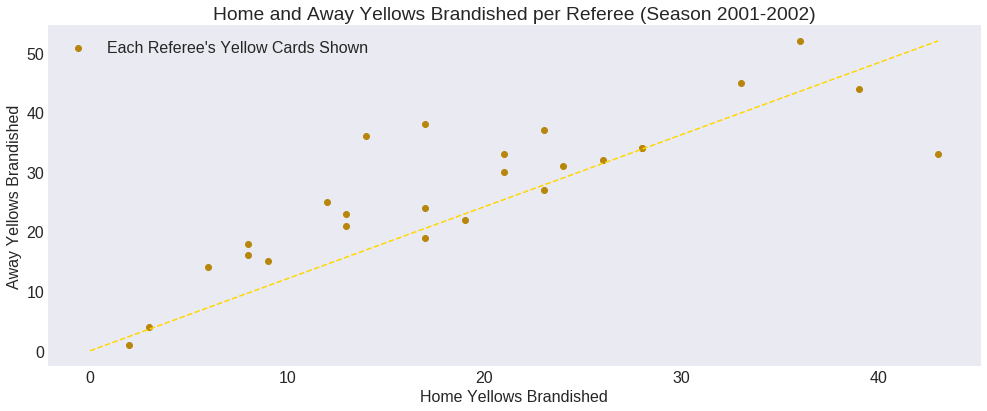

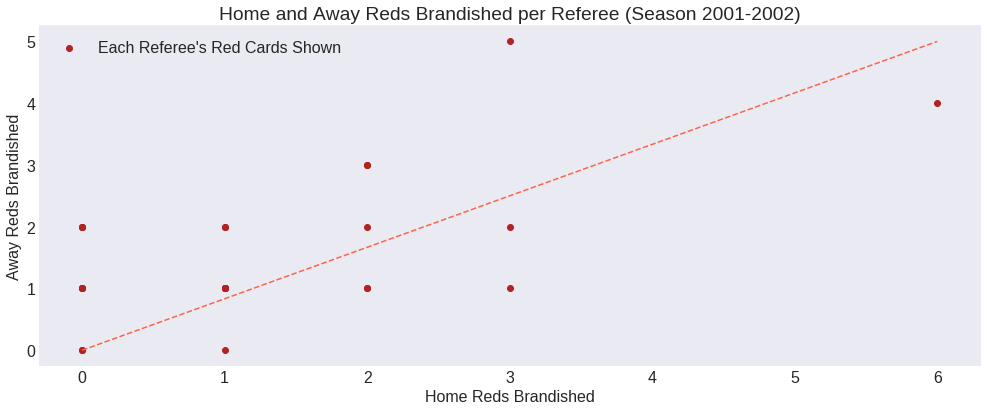

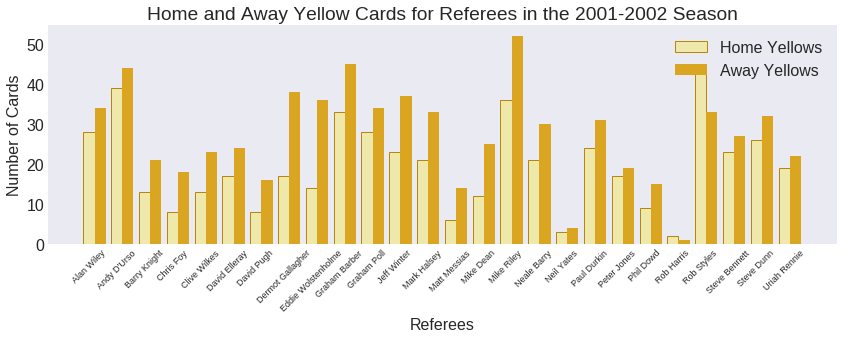

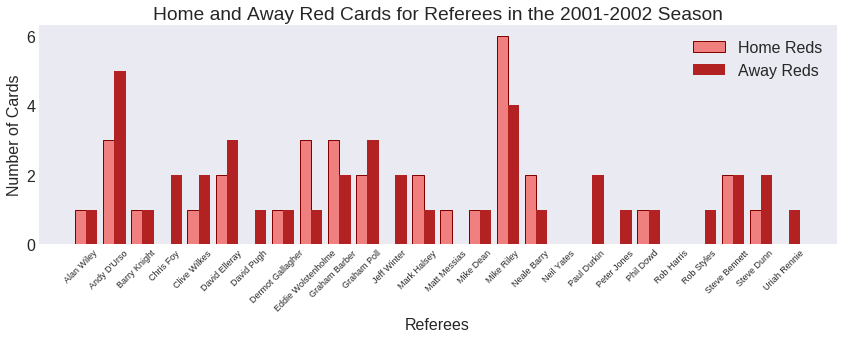

In [571]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2001-2002)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2001.HY,refs2001.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2001-2002)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2001.HR,refs2001.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2001-2002 Season'
BarGraphGrouped(refs2001.ref_name,ybartit,'Referees','Number of Cards',refs2001.HY,'Home Yellows',refs2001.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2001-2002 Season'
BarGraphGrouped(refs2001.ref_name,rbartit,'Referees','Number of Cards',refs2001.HR,'Home Reds',refs2001.AR,'Away Reds','red')

In [572]:
df2002 = create_df('../data/2002/df_2002.csv')
refs2002 = create_ref_df(df2002)

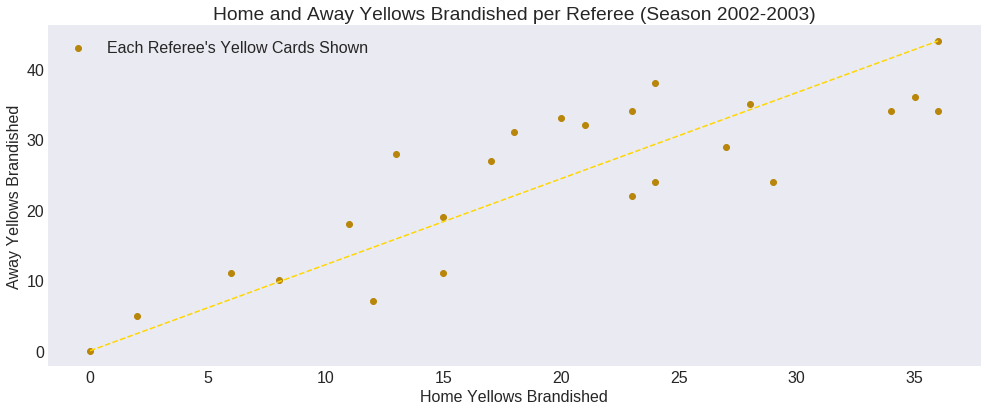

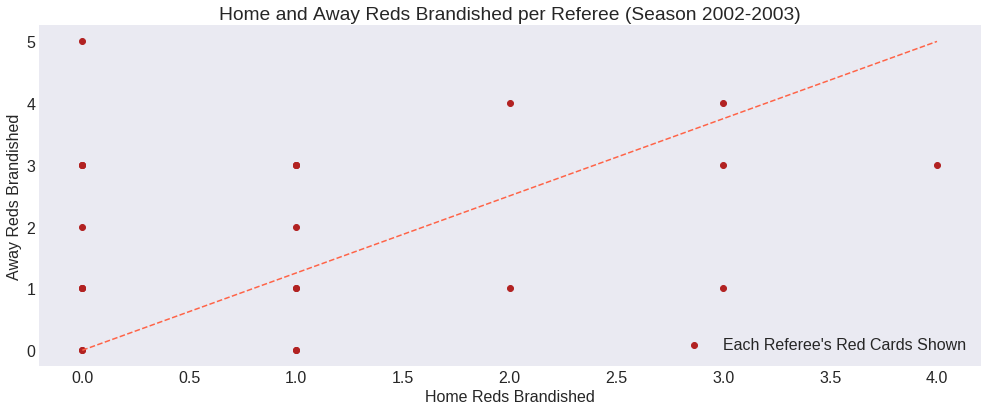

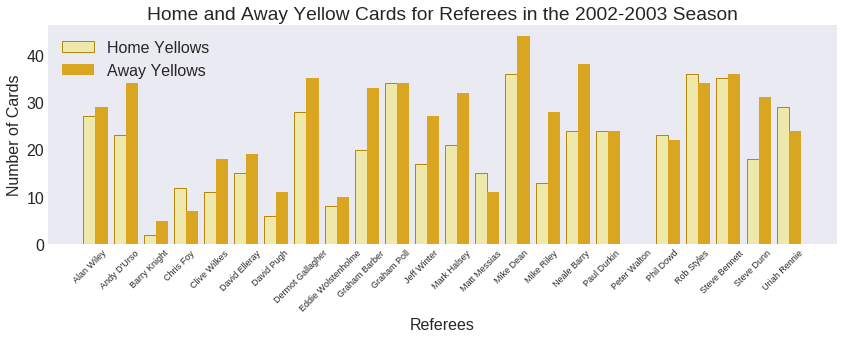

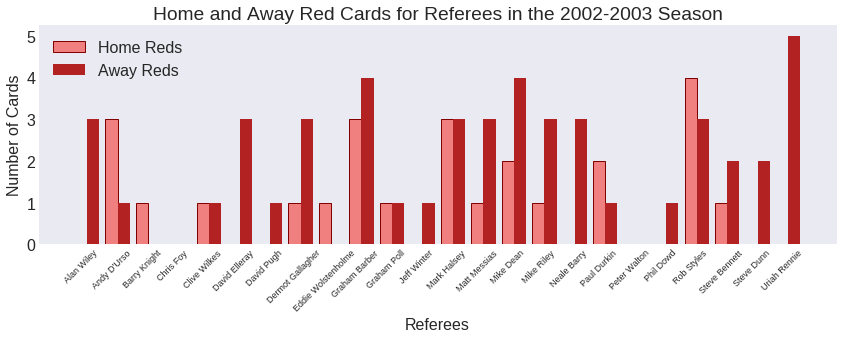

In [573]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2002-2003)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2002.HY,refs2002.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2002-2003)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2002.HR,refs2002.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2002-2003 Season'
BarGraphGrouped(refs2002.ref_name,ybartit,'Referees','Number of Cards',refs2002.HY,'Home Yellows',refs2002.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2002-2003 Season'
BarGraphGrouped(refs2002.ref_name,rbartit,'Referees','Number of Cards',refs2002.HR,'Home Reds',refs2002.AR,'Away Reds','red')

In [574]:
df2003 = create_df('../data/2003/df_2003.csv')
refs2003 = create_ref_df(df2003)

In [575]:
df2004 = create_df('../data/2004/df_2004.csv')
refs2004 = create_ref_df(df2004)

In [576]:
df2005 = create_df('../data/2005/df_2005.csv')
refs2005 = create_ref_df(df2005)

In [577]:
df2006 = create_df('../data/2006/df_2006.csv')
refs2006 = create_ref_df(df2006)

In [578]:
df2007 = create_df('../data/2007/df_2007.csv')
refs2007 = create_ref_df(df2007)

In [579]:
df2008 = create_df('../data/2008/df_2008.csv')
refs2008 = create_ref_df(df2008)

In [580]:
df2009 = create_df('../data/2009/df_2009.csv')
refs2009 = create_ref_df(df2009)

In [581]:
df2010 = create_df('../datayscattit = 'Home and Away Yellows Brandished per Referee (Season 2003-/2010/df_2010.csv')
refs2010 = create_ref_df(df2010)

In [582]:
df2011 = create_df('../data/2011/df_2011.csv')
refs2011 = create_ref_df(df2011)

In [583]:
df2012 = create_df('../data/2012/df_2012.csv')
refs2012 = create_ref_df(df2012)

In [584]:
df2013 = create_df('../data/2013/df_2013.csv')
refs2013 = create_ref_df(df2013)

In [585]:
df2014 = create_df('../data/2014/df_2014.csv')
refs2014 = create_ref_df(df2014)

In [586]:
df2015 = create_df('../data/2015/df_2015.csv')
refs2015 = create_ref_df(df2015)

In [587]:
df2016 = create_df('../data/2016/df_2016.csv')
refs2016 = create_ref_df(df2016)

In [588]:
df2017 = create_df('../data/2017/df_2017.csv')
refs2017 = create_ref_df(df2017)

In [589]:
df2018 = create_df('../data/2018/df_2018.csv')
refs2018 = create_ref_df(df2018)

In [596]:
start = '2019-08-01'
mask = (working_df.Date > start)
df_2019 = working_df.loc[mask]
df_2019.to_csv(f'/home/josh/Documents/dsi/caps/cap1/data/2019/df_2019.csv')
df2019 = create_df('../data/2019/df_2019.csv')
refs2019 = create_ref_df(df2019)

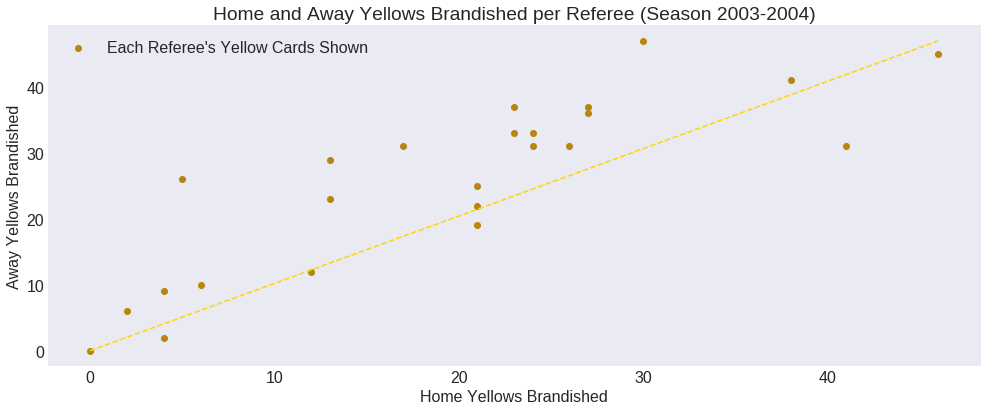

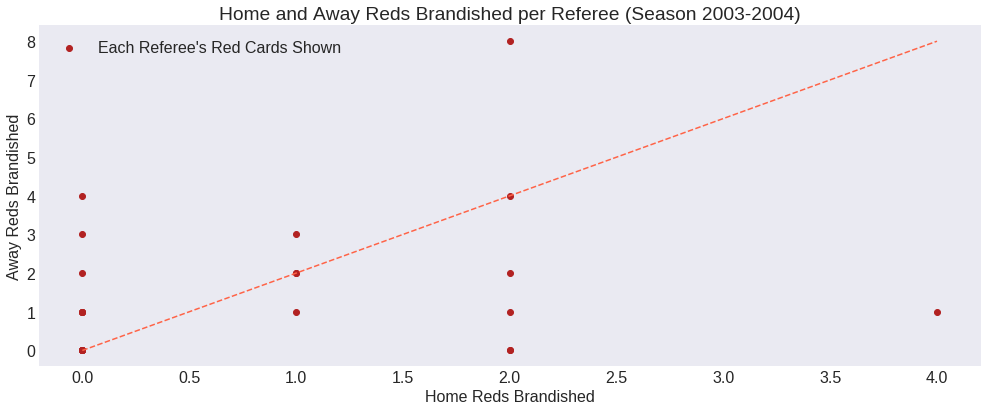

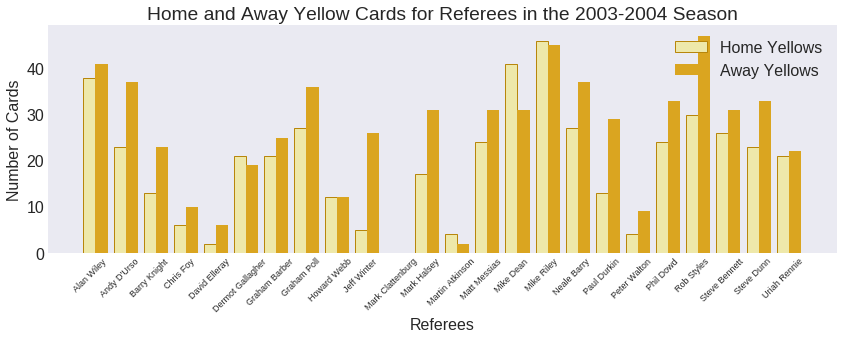

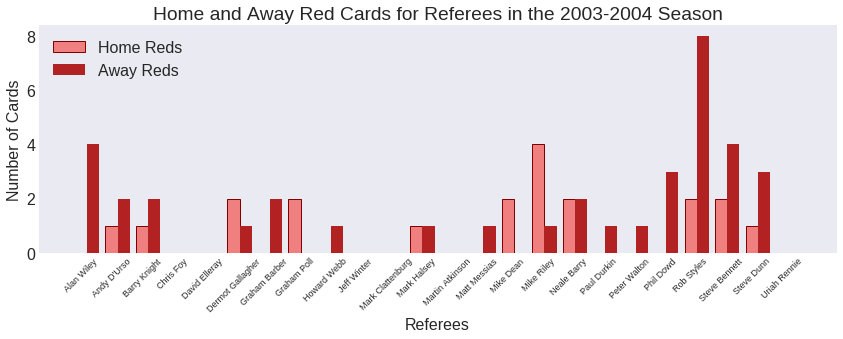

In [597]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2003-2004)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2003.HY,refs2003.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2003-2004)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2003.HR,refs2003.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2003-2004 Season'
BarGraphGrouped(refs2003.ref_name,ybartit,'Referees','Number of Cards',refs2003.HY,'Home Yellows',refs2003.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2003-2004 Season'
BarGraphGrouped(refs2003.ref_name,rbartit,'Referees','Number of Cards',refs2003.HR,'Home Reds',refs2003.AR,'Away Reds','red')

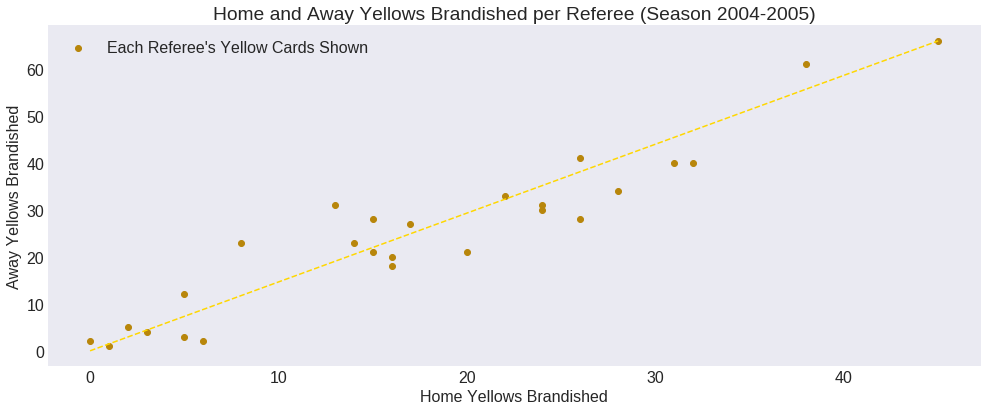

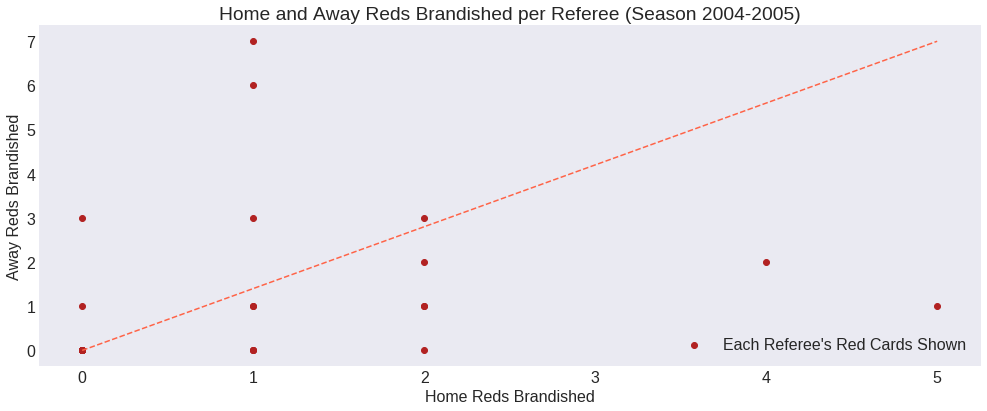

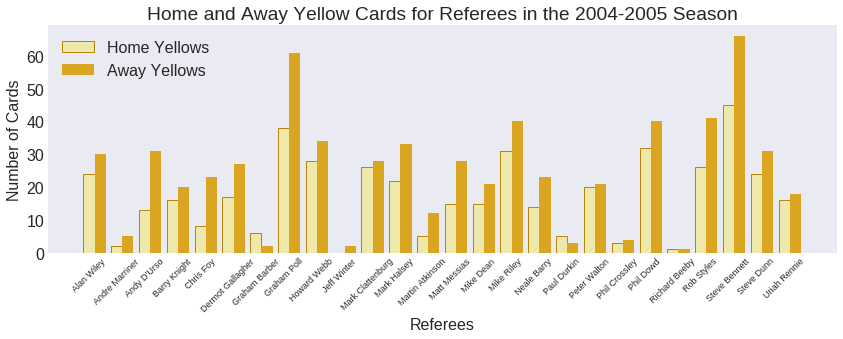

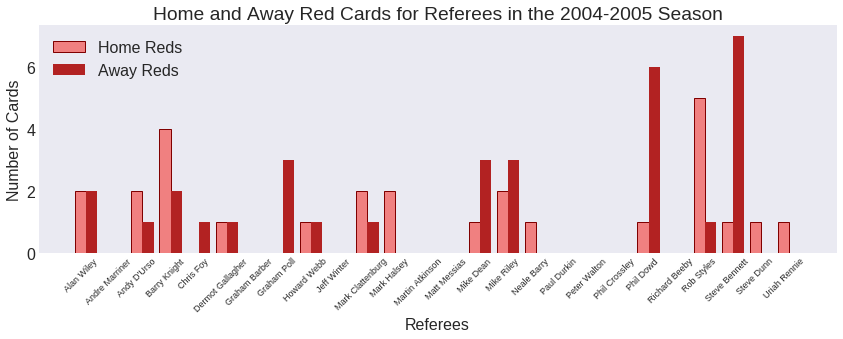

In [598]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2004-2005)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2004.HY,refs2004.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2004-2005)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2004.HR,refs2004.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2004-2005 Season'
BarGraphGrouped(refs2004.ref_name,ybartit,'Referees','Number of Cards',refs2004.HY,'Home Yellows',refs2004.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2004-2005 Season'
BarGraphGrouped(refs2004.ref_name,rbartit,'Referees','Number of Cards',refs2004.HR,'Home Reds',refs2004.AR,'Away Reds','red')

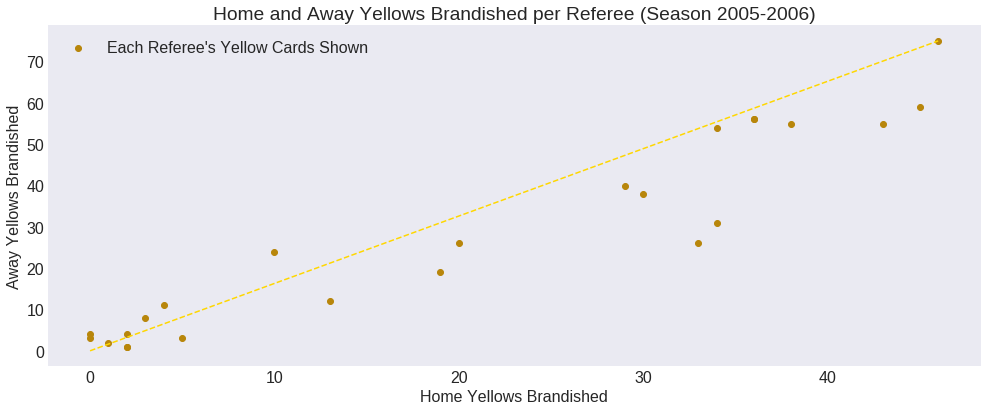

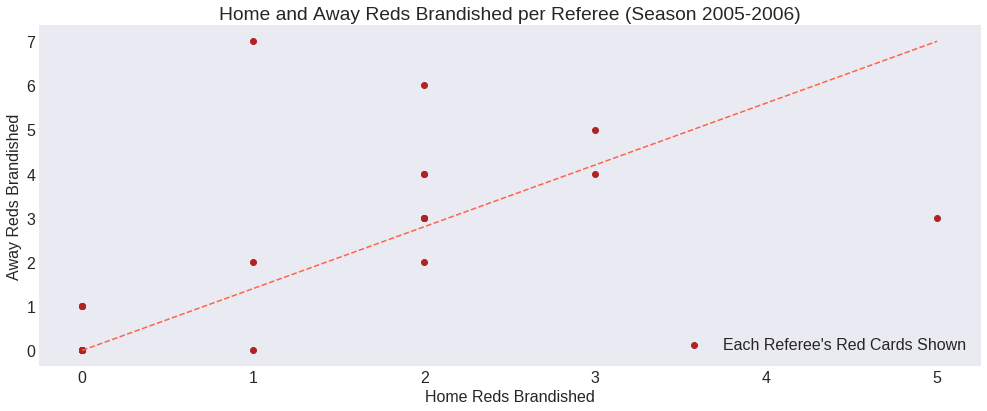

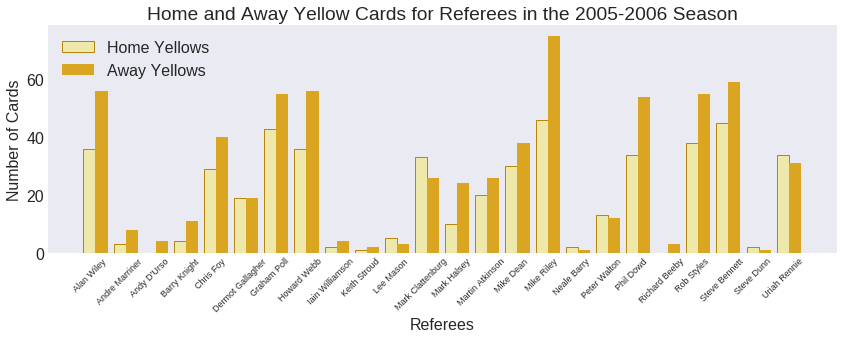

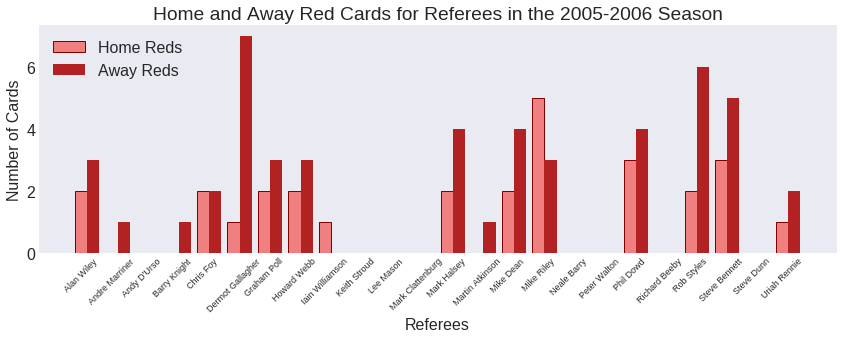

In [599]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2005-2006)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2005.HY,refs2005.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2005-2006)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2005.HR,refs2005.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2005-2006 Season'
BarGraphGrouped(refs2005.ref_name,ybartit,'Referees','Number of Cards',refs2005.HY,'Home Yellows',refs2005.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2005-2006 Season'
BarGraphGrouped(refs2005.ref_name,rbartit,'Referees','Number of Cards',refs2005.HR,'Home Reds',refs2005.AR,'Away Reds','red')

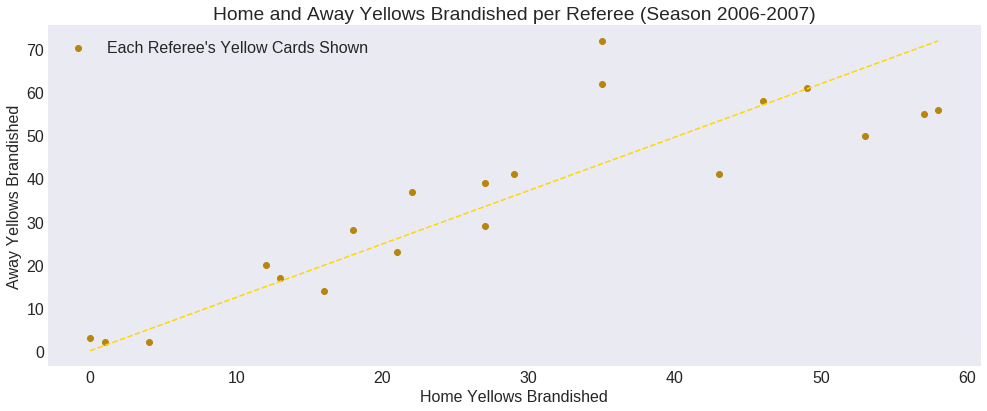

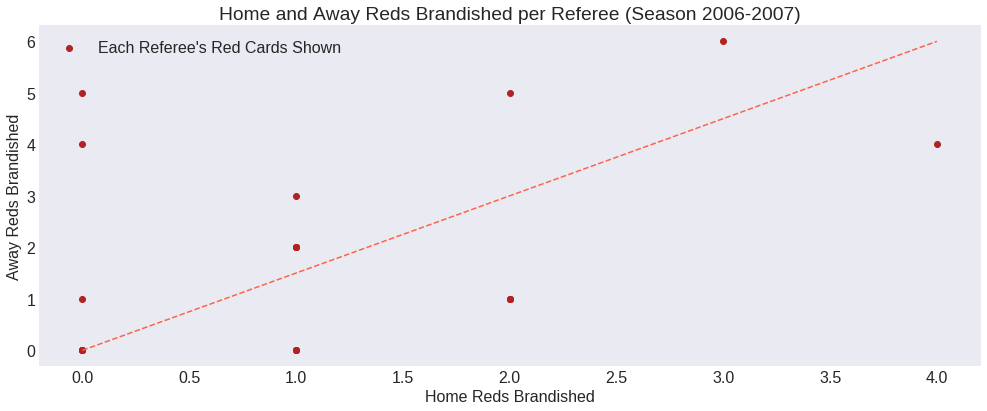

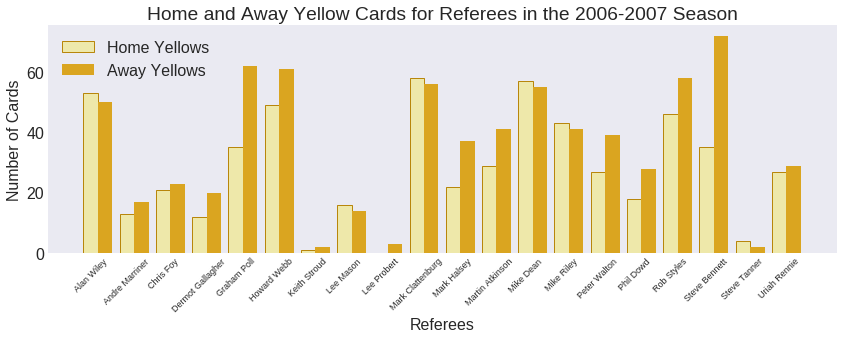

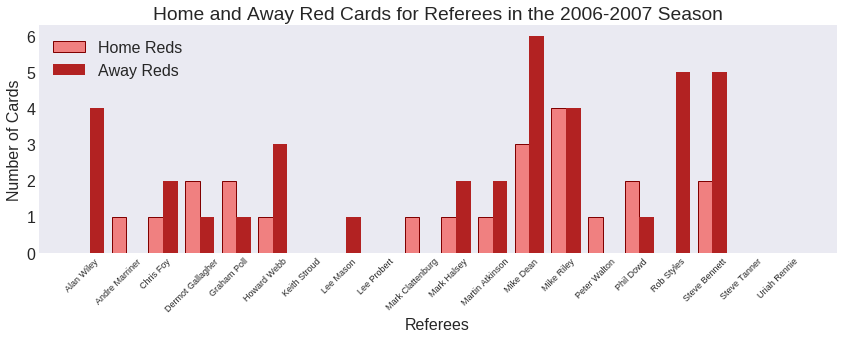

In [600]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2006-2007)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2006.HY,refs2006.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2006-2007)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2006.HR,refs2006.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2006-2007 Season'
BarGraphGrouped(refs2006.ref_name,ybartit,'Referees','Number of Cards',refs2006.HY,'Home Yellows',refs2006.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2006-2007 Season'
BarGraphGrouped(refs2006.ref_name,rbartit,'Referees','Number of Cards',refs2006.HR,'Home Reds',refs2006.AR,'Away Reds','red')

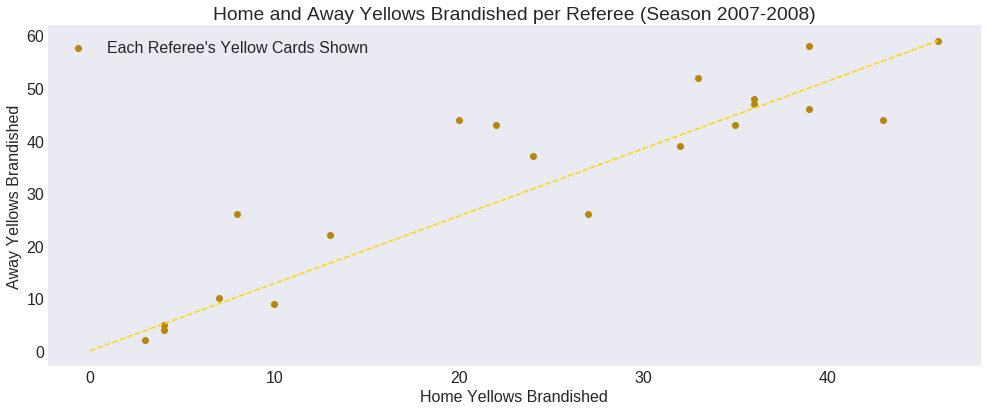

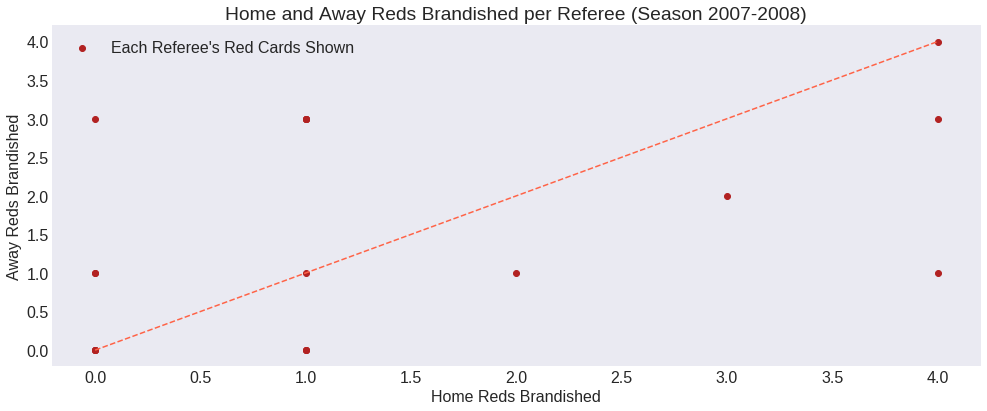

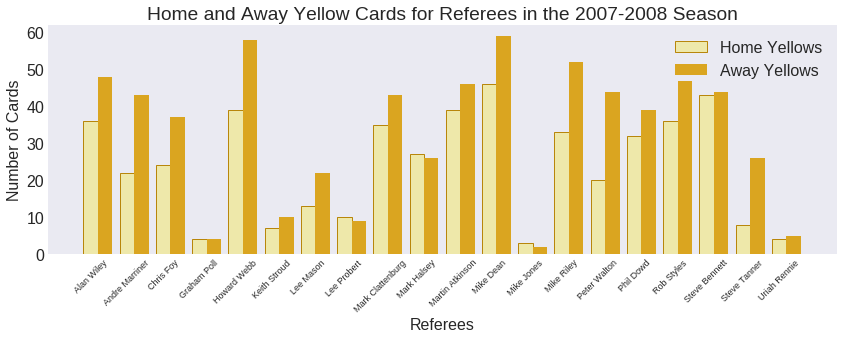

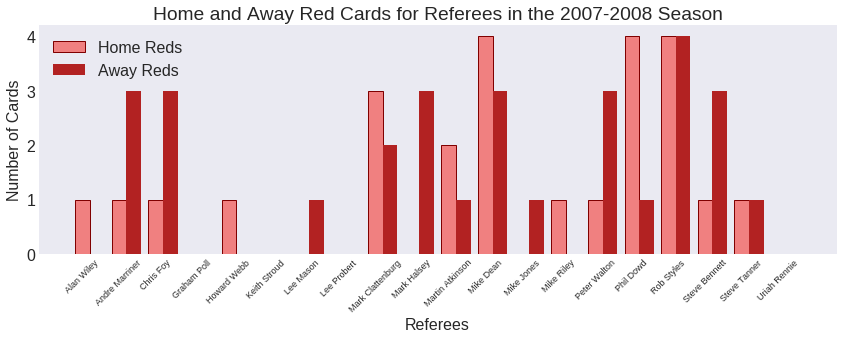

In [601]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2007-2008)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2007.HY,refs2007.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2007-2008)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2007.HR,refs2007.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2007-2008 Season'
BarGraphGrouped(refs2007.ref_name,ybartit,'Referees','Number of Cards',refs2007.HY,'Home Yellows',refs2007.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2007-2008 Season'
BarGraphGrouped(refs2007.ref_name,rbartit,'Referees','Number of Cards',refs2007.HR,'Home Reds',refs2007.AR,'Away Reds','red')

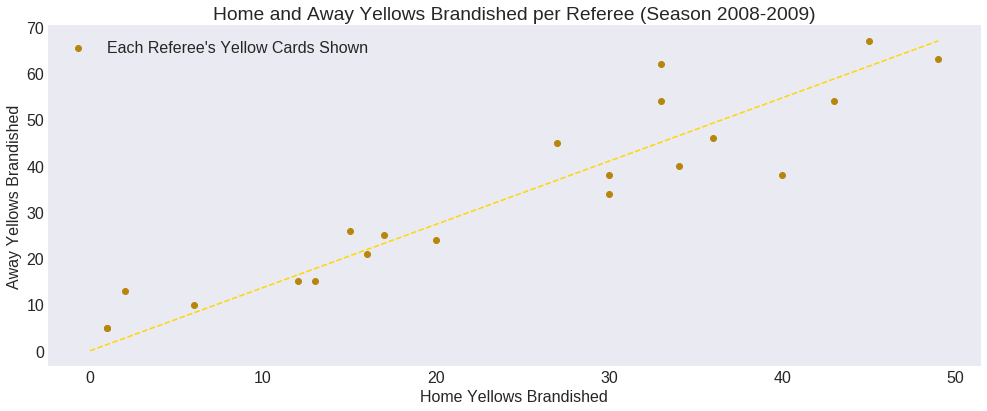

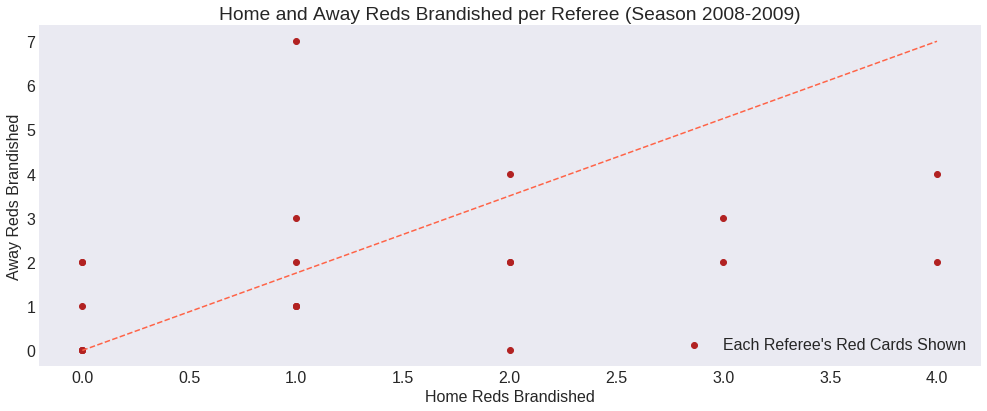

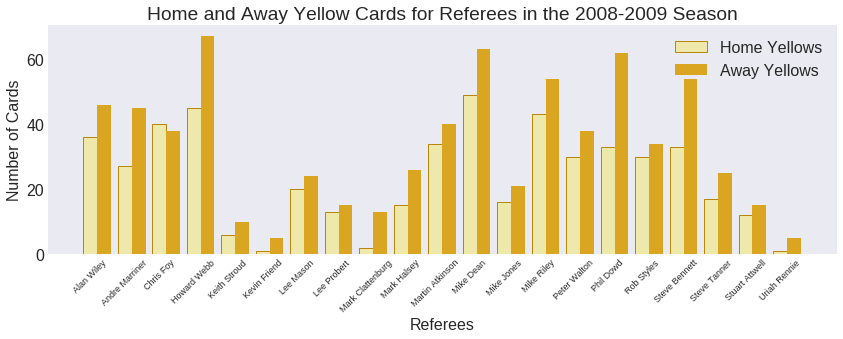

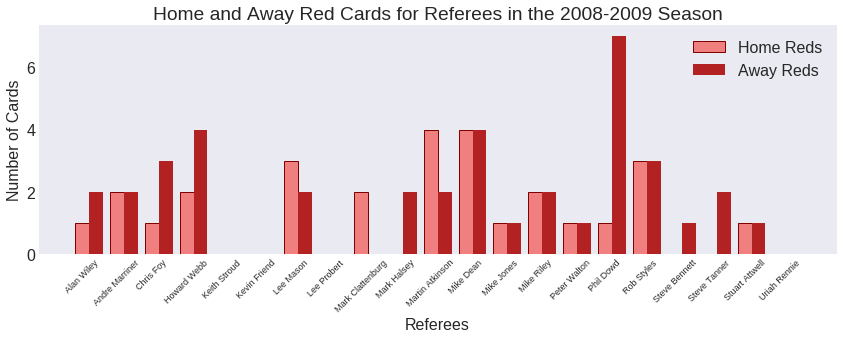

In [602]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2008-2009)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2008.HY,refs2008.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2008-2009)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2008.HR,refs2008.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2008-2009 Season'
BarGraphGrouped(refs2008.ref_name,ybartit,'Referees','Number of Cards',refs2008.HY,'Home Yellows',refs2008.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2008-2009 Season'
BarGraphGrouped(refs2008.ref_name,rbartit,'Referees','Number of Cards',refs2008.HR,'Home Reds',refs2008.AR,'Away Reds','red')

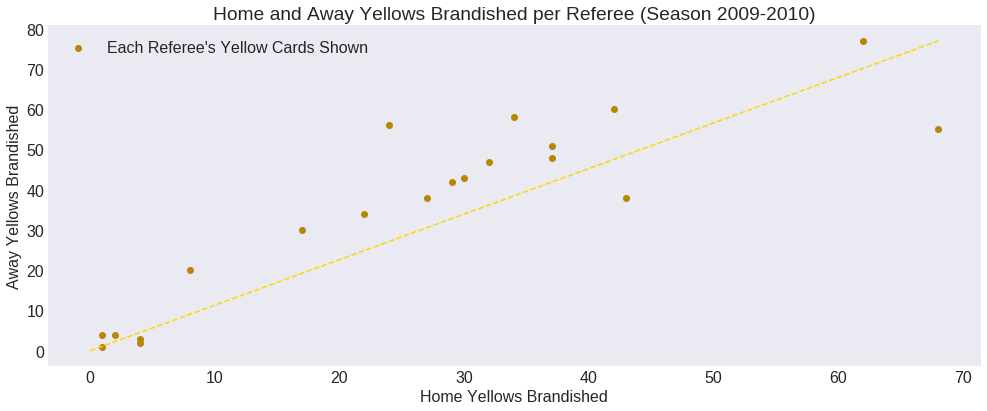

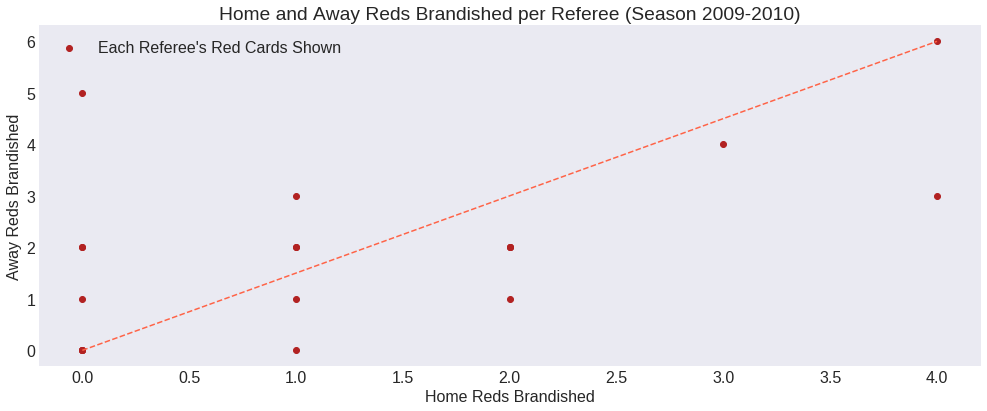

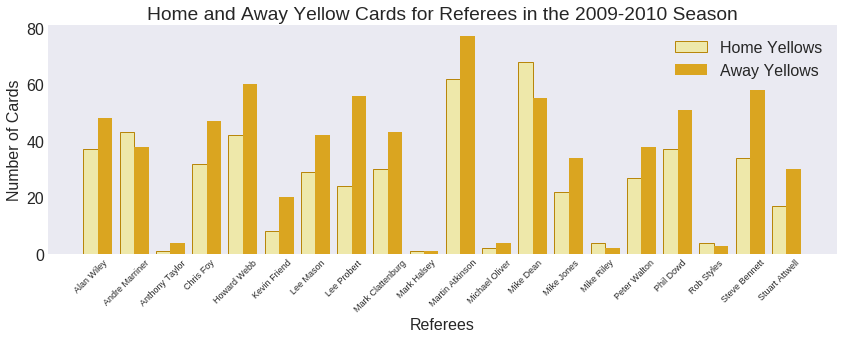

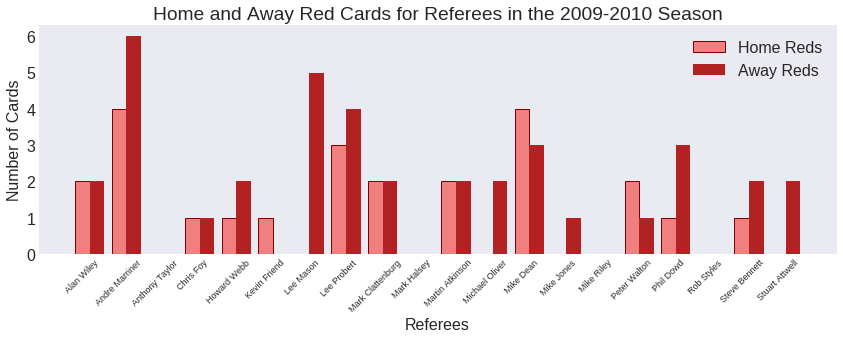

In [603]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2009-2010)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2009.HY,refs2009.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2009-2010)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2009.HR,refs2009.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2009-2010 Season'
BarGraphGrouped(refs2009.ref_name,ybartit,'Referees','Number of Cards',refs2009.HY,'Home Yellows',refs2009.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2009-2010 Season'
BarGraphGrouped(refs2009.ref_name,rbartit,'Referees','Number of Cards',refs2009.HR,'Home Reds',refs2009.AR,'Away Reds','red')

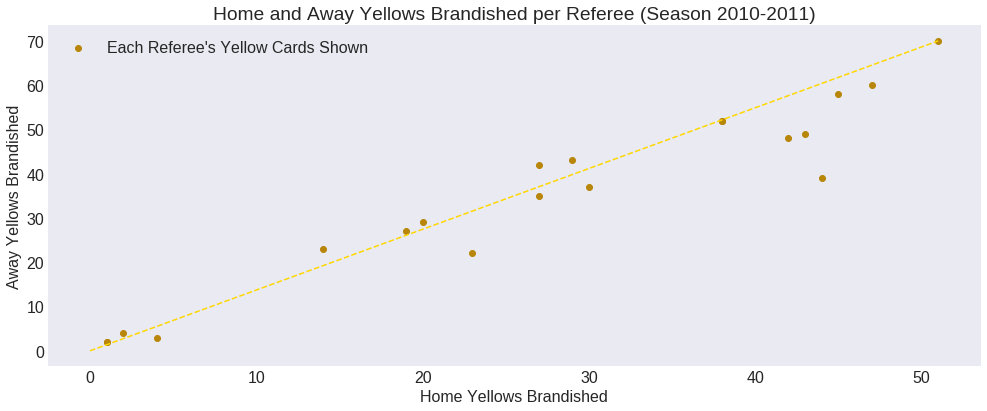

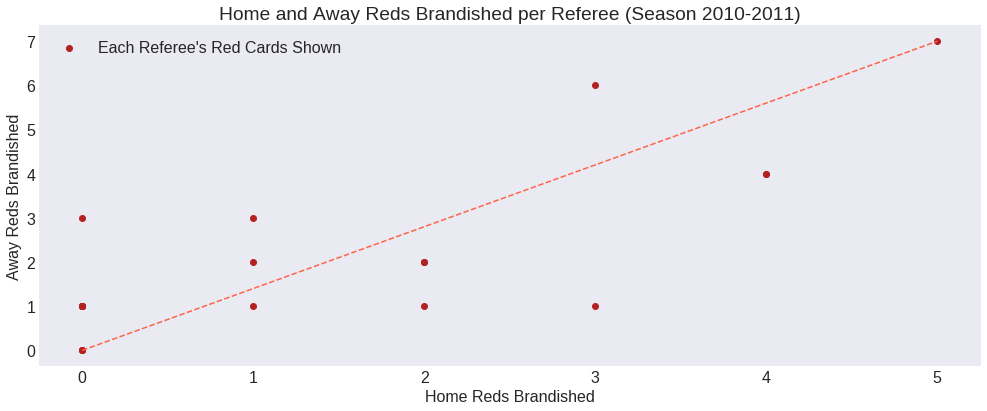

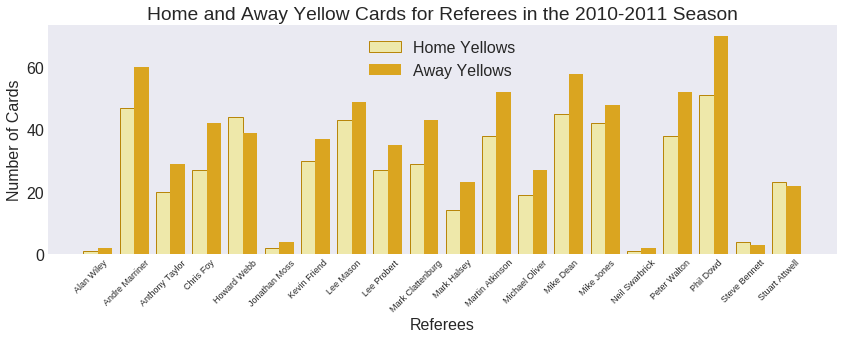

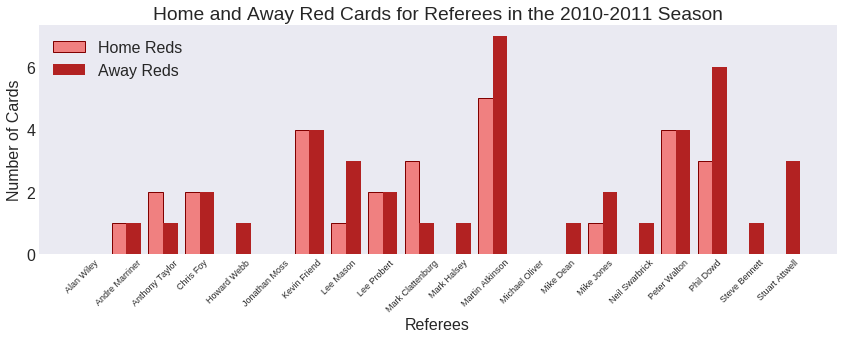

In [604]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2010-2011)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2010.HY,refs2010.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2010-2011)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2010.HR,refs2010.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2010-2011 Season'
BarGraphGrouped(refs2010.ref_name,ybartit,'Referees','Number of Cards',refs2010.HY,'Home Yellows',refs2010.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2010-2011 Season'
BarGraphGrouped(refs2010.ref_name,rbartit,'Referees','Number of Cards',refs2010.HR,'Home Reds',refs2010.AR,'Away Reds','red')

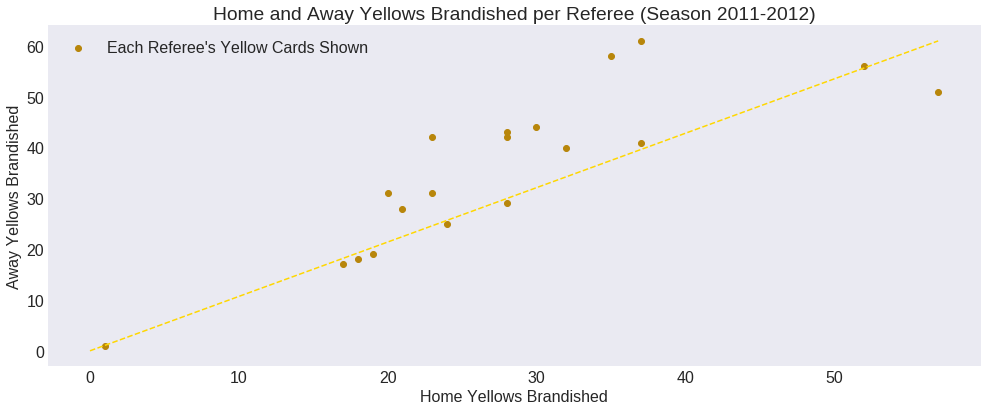

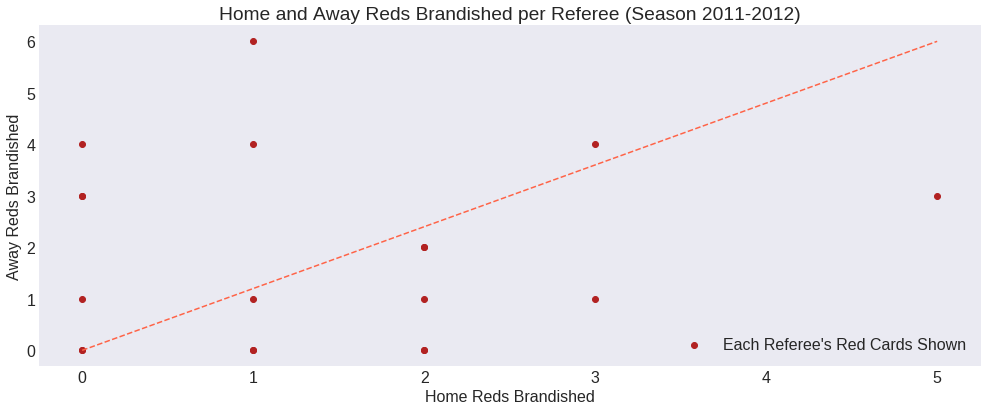

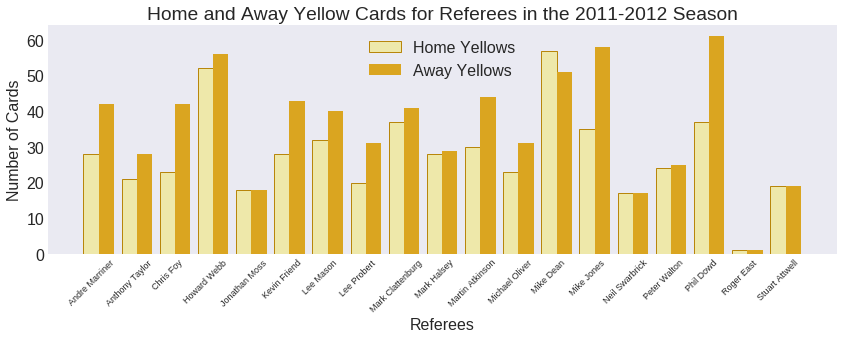

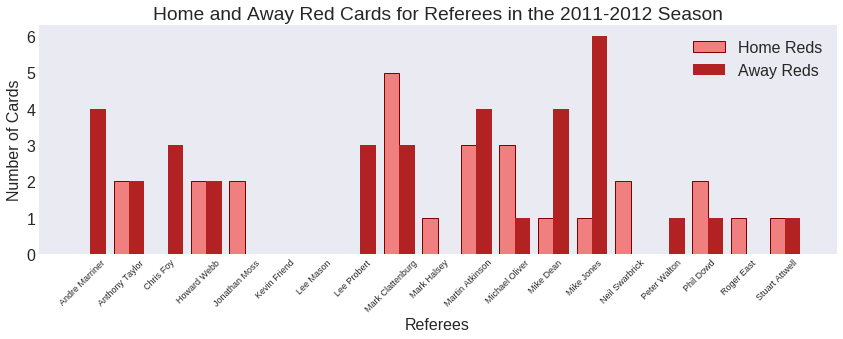

In [605]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2011-2012)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2011.HY,refs2011.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2011-2012)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2011.HR,refs2011.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2011-2012 Season'
BarGraphGrouped(refs2011.ref_name,ybartit,'Referees','Number of Cards',refs2011.HY,'Home Yellows',refs2011.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2011-2012 Season'
BarGraphGrouped(refs2011.ref_name,rbartit,'Referees','Number of Cards',refs2011.HR,'Home Reds',refs2011.AR,'Away Reds','red')

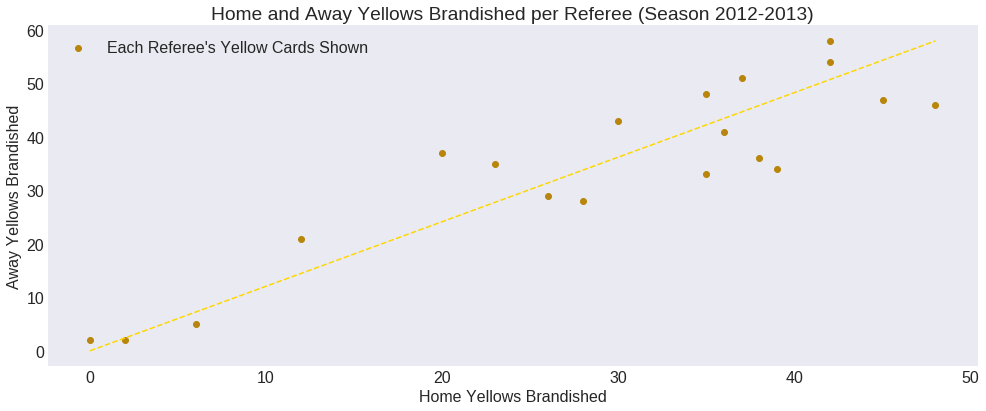

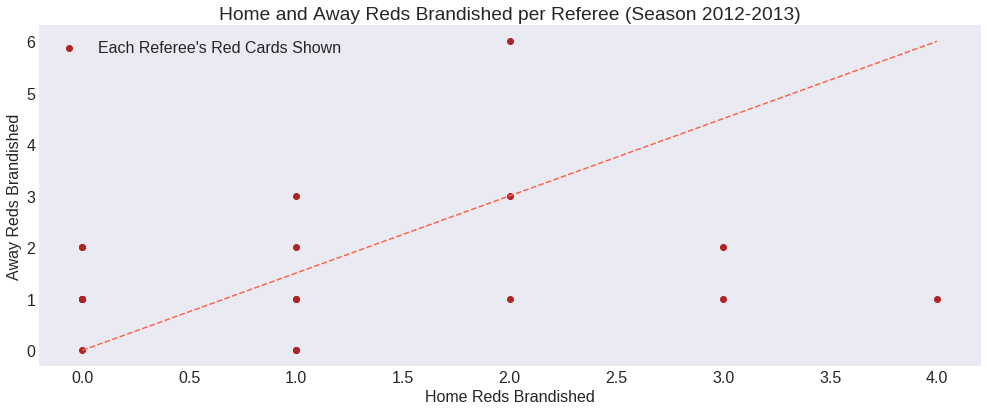

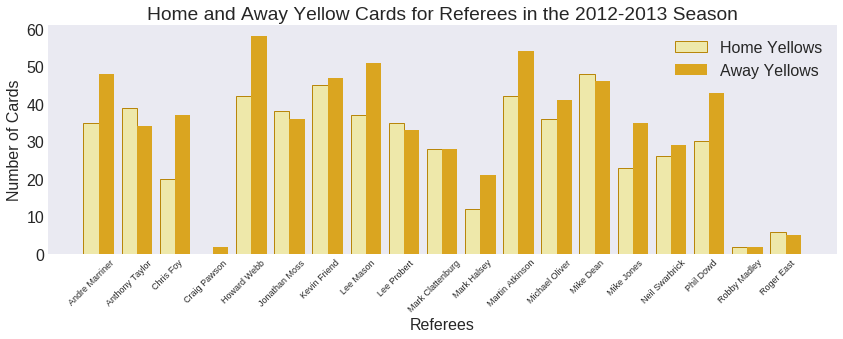

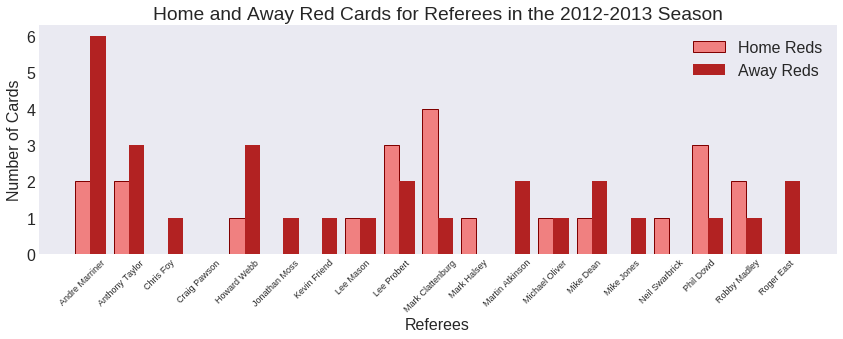

In [606]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2012-2013)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2012.HY,refs2012.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2012-2013)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2012.HR,refs2012.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2012-2013 Season'
BarGraphGrouped(refs2012.ref_name,ybartit,'Referees','Number of Cards',refs2012.HY,'Home Yellows',refs2012.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2012-2013 Season'
BarGraphGrouped(refs2012.ref_name,rbartit,'Referees','Number of Cards',refs2012.HR,'Home Reds',refs2012.AR,'Away Reds','red')

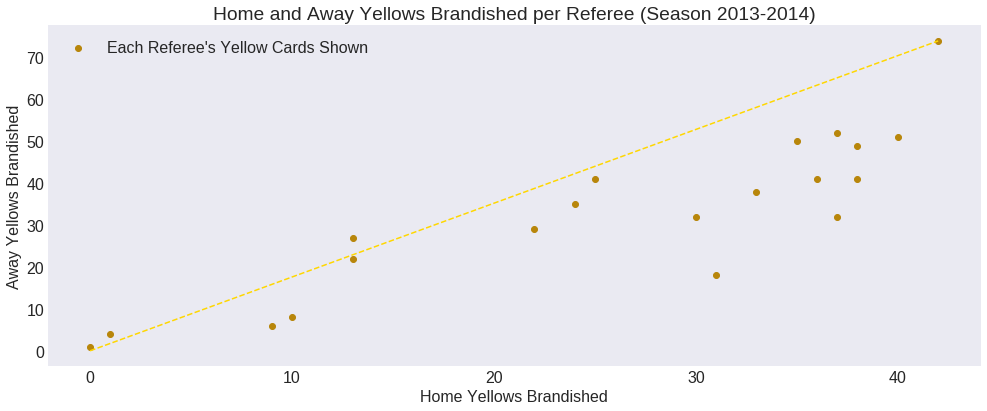

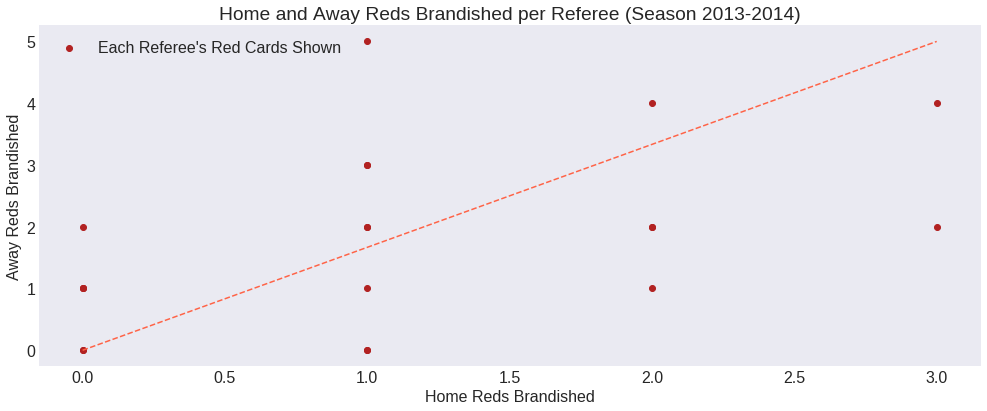

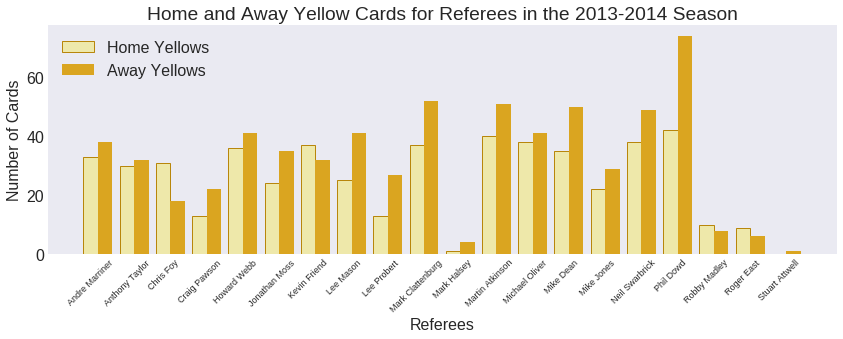

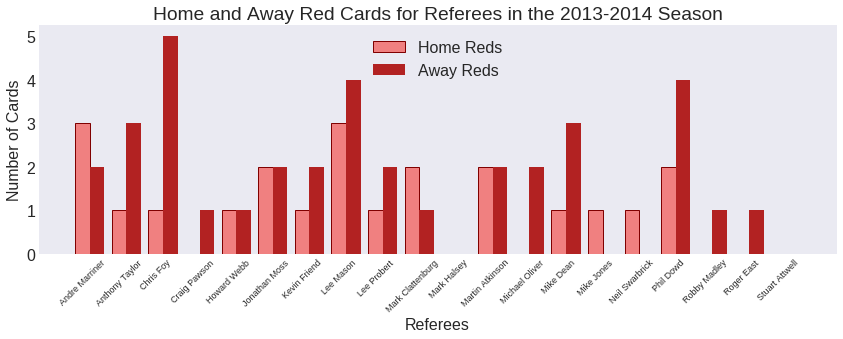

In [607]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2013-2014)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2013.HY,refs2013.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2013-2014)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2013.HR,refs2013.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2013-2014 Season'
BarGraphGrouped(refs2013.ref_name,ybartit,'Referees','Number of Cards',refs2013.HY,'Home Yellows',refs2013.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2013-2014 Season'
BarGraphGrouped(refs2013.ref_name,rbartit,'Referees','Number of Cards',refs2013.HR,'Home Reds',refs2013.AR,'Away Reds','red')

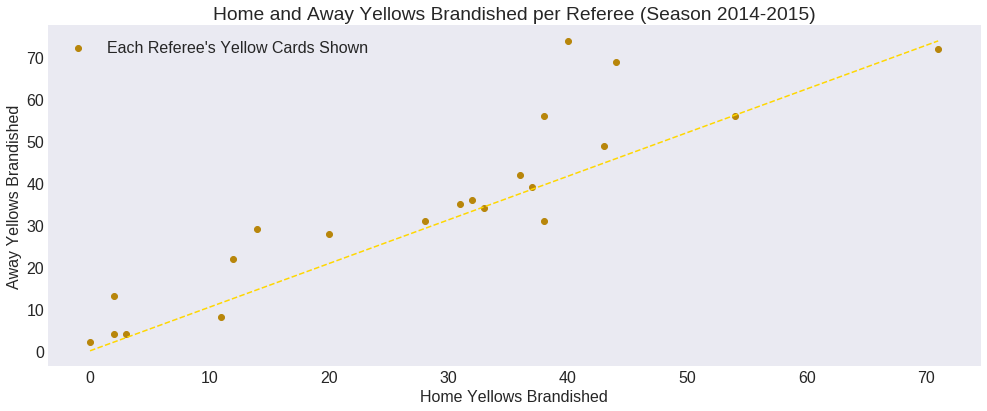

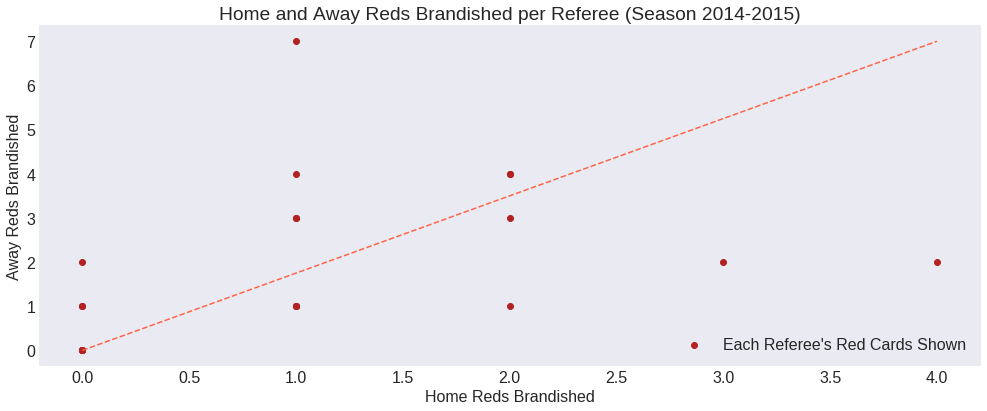

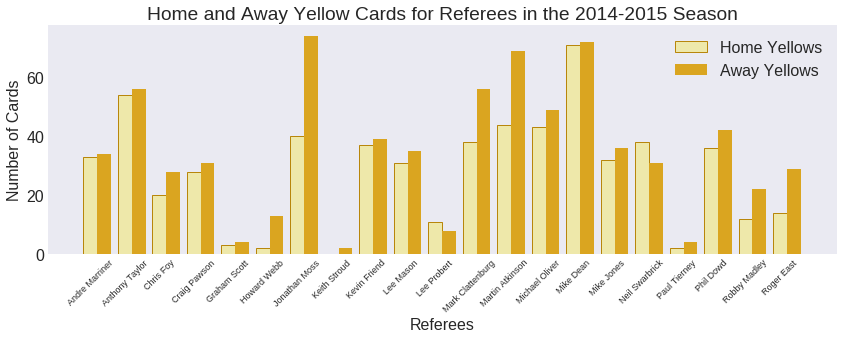

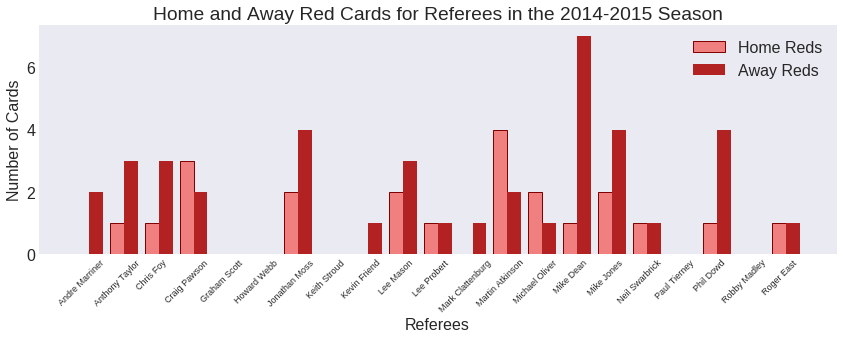

In [608]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2014-2015)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2014.HY,refs2014.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2014-2015)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2014.HR,refs2014.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2014-2015 Season'
BarGraphGrouped(refs2014.ref_name,ybartit,'Referees','Number of Cards',refs2014.HY,'Home Yellows',refs2014.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2014-2015 Season'
BarGraphGrouped(refs2014.ref_name,rbartit,'Referees','Number of Cards',refs2014.HR,'Home Reds',refs2014.AR,'Away Reds','red')

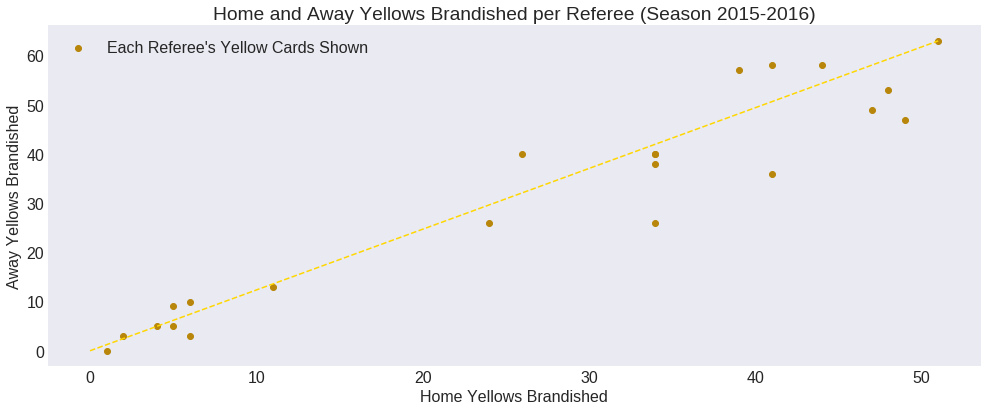

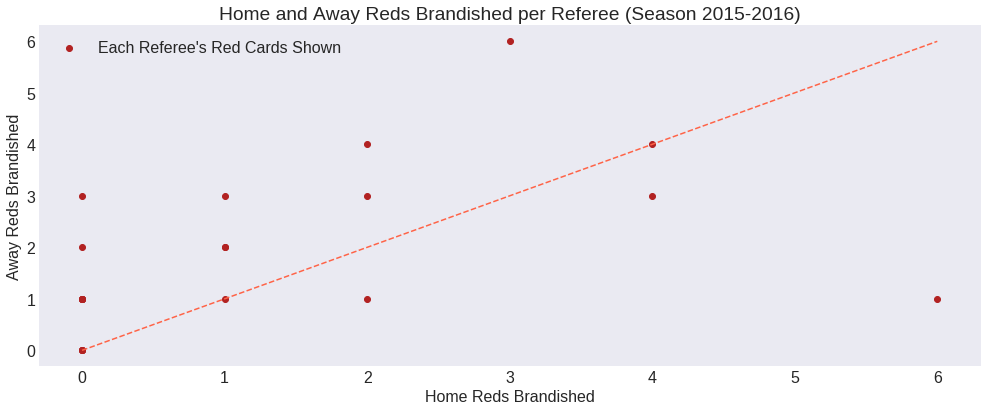

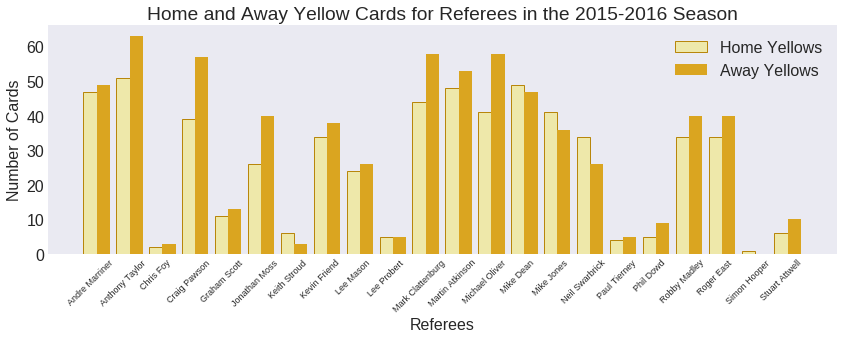

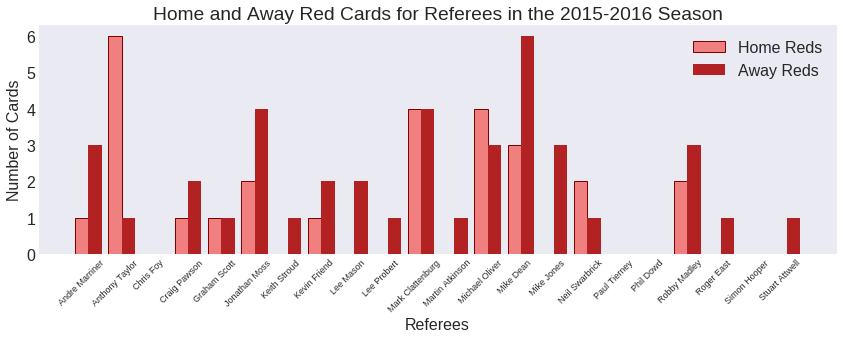

In [609]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2015-2016)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2015.HY,refs2015.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2015-2016)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2015.HR,refs2015.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2015-2016 Season'
BarGraphGrouped(refs2015.ref_name,ybartit,'Referees','Number of Cards',refs2015.HY,'Home Yellows',refs2015.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2015-2016 Season'
BarGraphGrouped(refs2015.ref_name,rbartit,'Referees','Number of Cards',refs2015.HR,'Home Reds',refs2015.AR,'Away Reds','red')

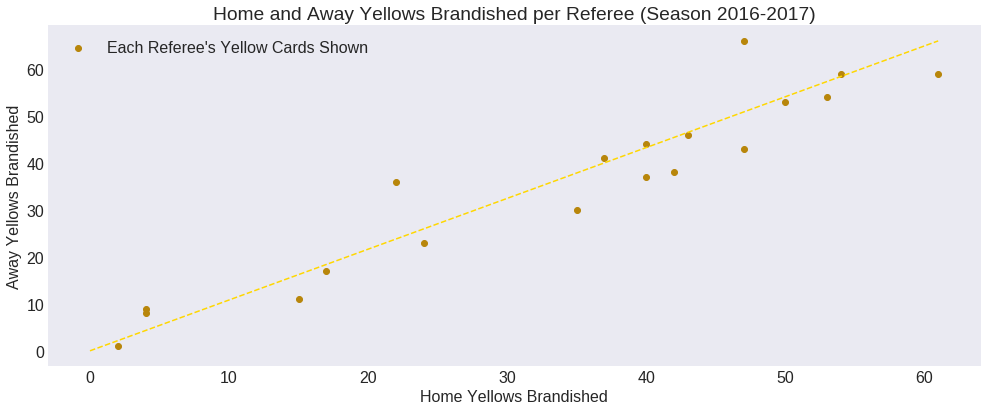

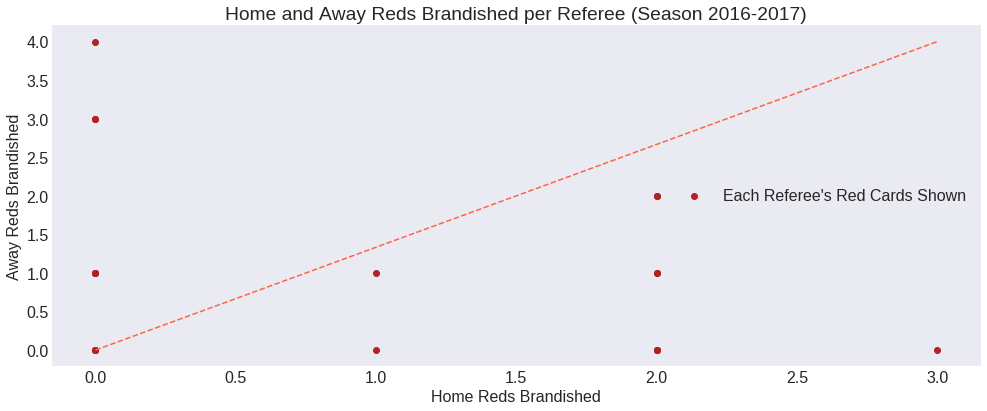

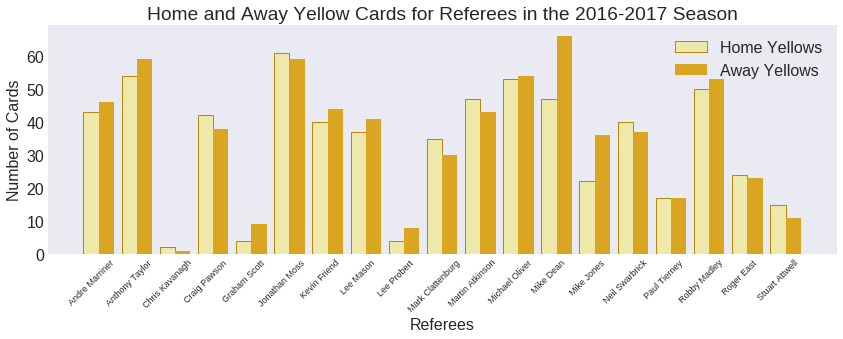

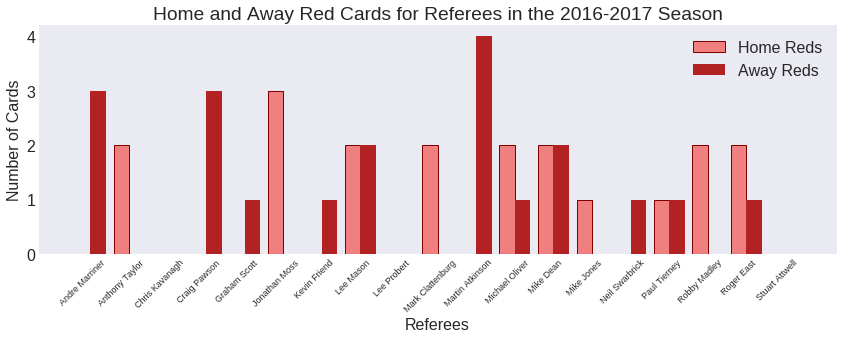

In [610]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2016-2017)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2016.HY,refs2016.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2016-2017)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2016.HR,refs2016.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2016-2017 Season'
BarGraphGrouped(refs2016.ref_name,ybartit,'Referees','Number of Cards',refs2016.HY,'Home Yellows',refs2016.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2016-2017 Season'
BarGraphGrouped(refs2016.ref_name,rbartit,'Referees','Number of Cards',refs2016.HR,'Home Reds',refs2016.AR,'Away Reds','red')

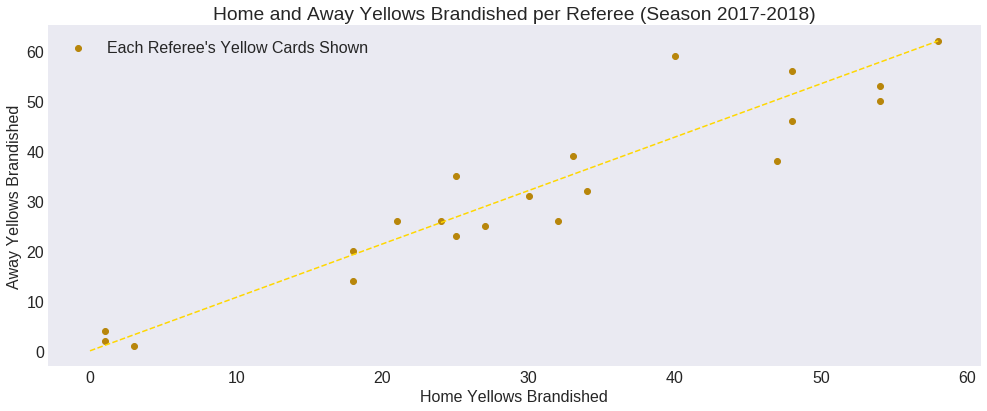

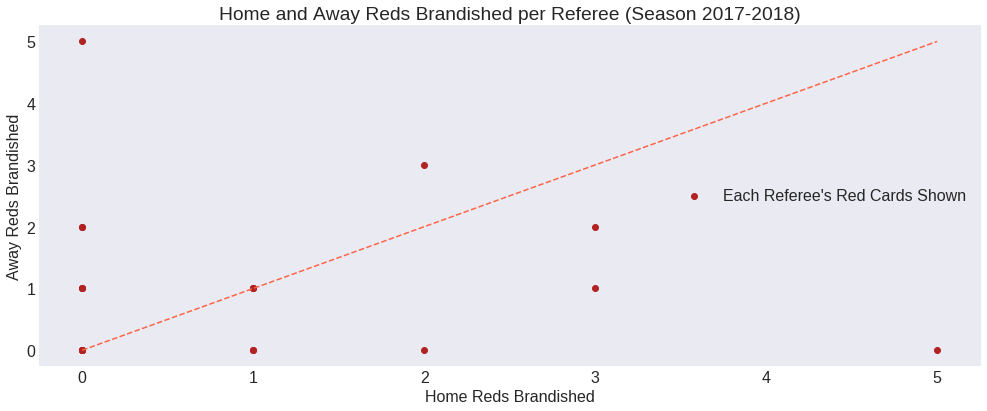

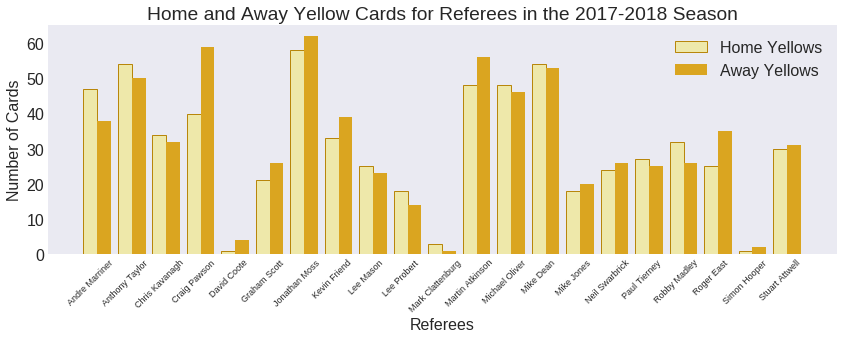

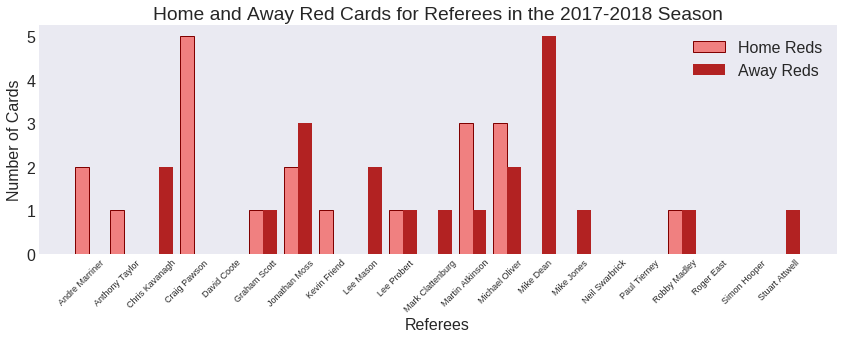

In [611]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2017-2018)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2017.HY,refs2017.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2017-2018)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2017.HR,refs2017.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2017-2018 Season'
BarGraphGrouped(refs2017.ref_name,ybartit,'Referees','Number of Cards',refs2017.HY,'Home Yellows',refs2017.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2017-2018 Season'
BarGraphGrouped(refs2017.ref_name,rbartit,'Referees','Number of Cards',refs2017.HR,'Home Reds',refs2017.AR,'Away Reds','red')

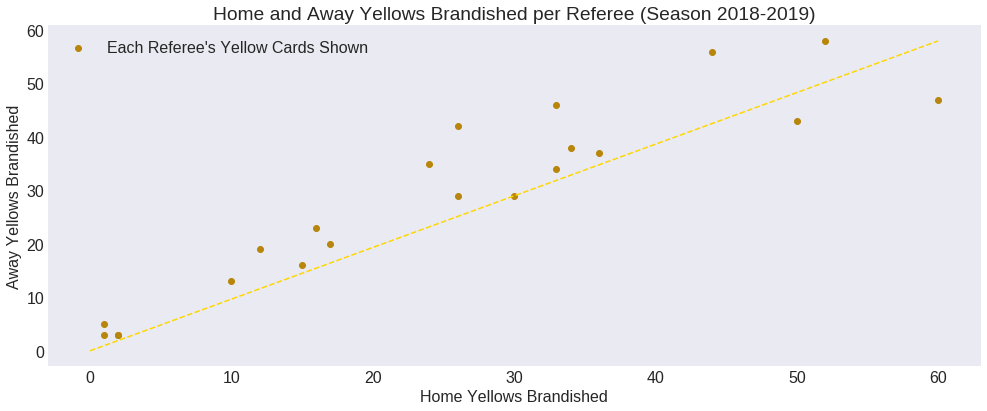

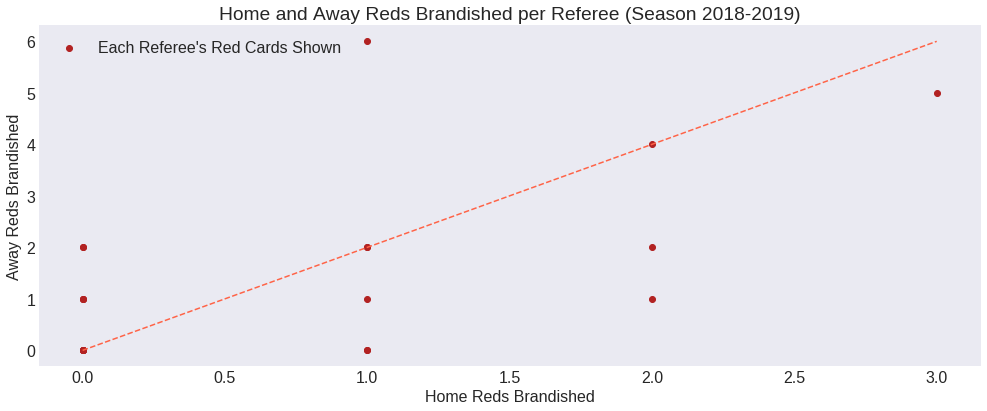

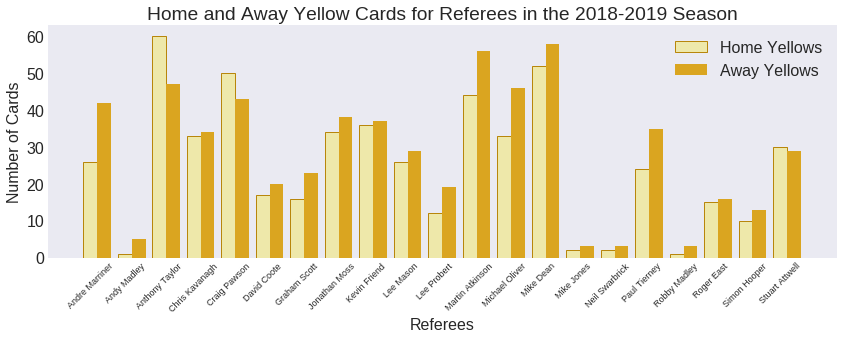

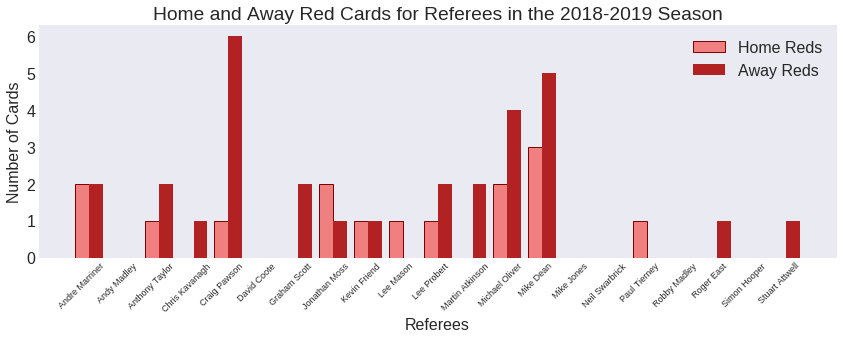

In [612]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2018-2019)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2018.HY,refs2018.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2018-2019)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2018.HR,refs2018.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2018-2019 Season'
BarGraphGrouped(refs2018.ref_name,ybartit,'Referees','Number of Cards',refs2018.HY,'Home Yellows',refs2018.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2018-2019 Season'
BarGraphGrouped(refs2018.ref_name,rbartit,'Referees','Number of Cards',refs2018.HR,'Home Reds',refs2018.AR,'Away Reds','red')

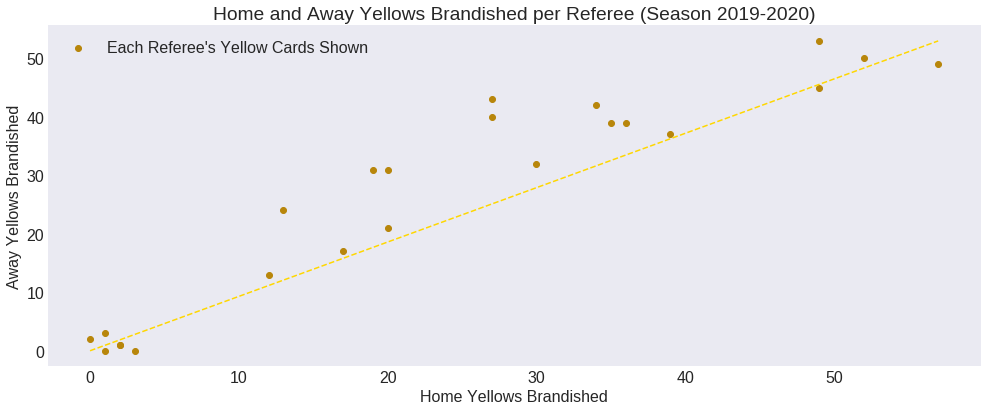

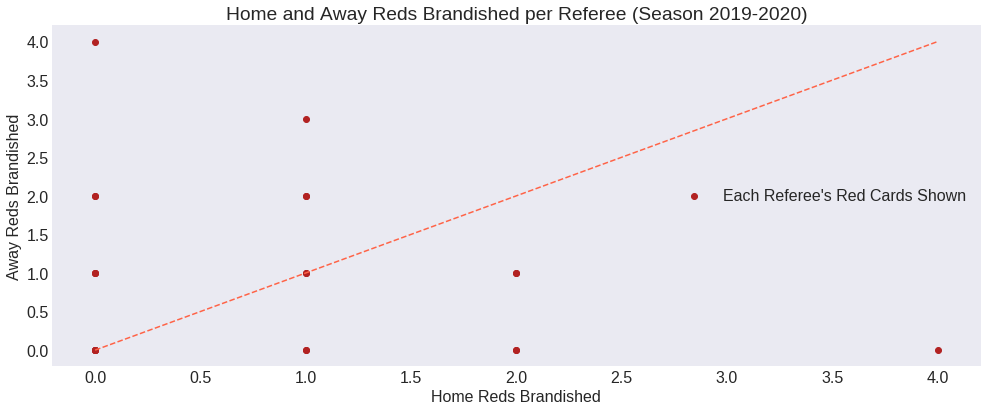

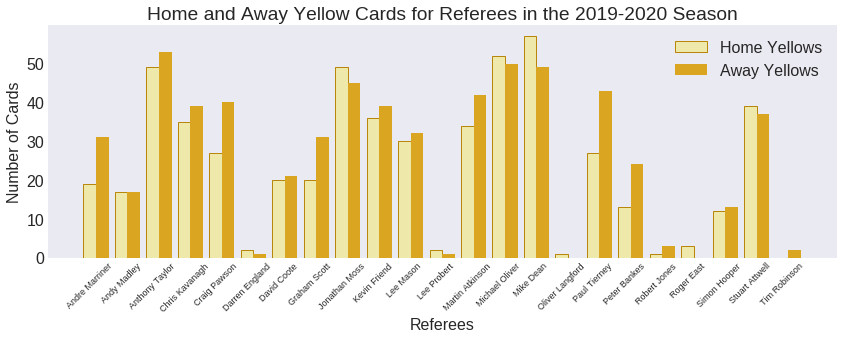

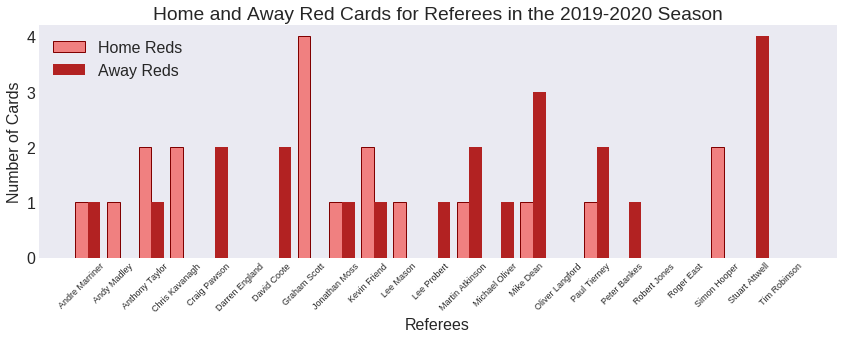

In [613]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2019-2020)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2019.HY,refs2019.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2019-2020)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2019.HR,refs2019.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2019-2020 Season'
BarGraphGrouped(refs2019.ref_name,ybartit,'Referees','Number of Cards',refs2019.HY,'Home Yellows',refs2019.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2019-2020 Season'
BarGraphGrouped(refs2019.ref_name,rbartit,'Referees','Number of Cards',refs2019.HR,'Home Reds',refs2019.AR,'Away Reds','red')

In [179]:
totrefs.columns

Index(['ref_name', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Games_reffed'],
      dtype='object')

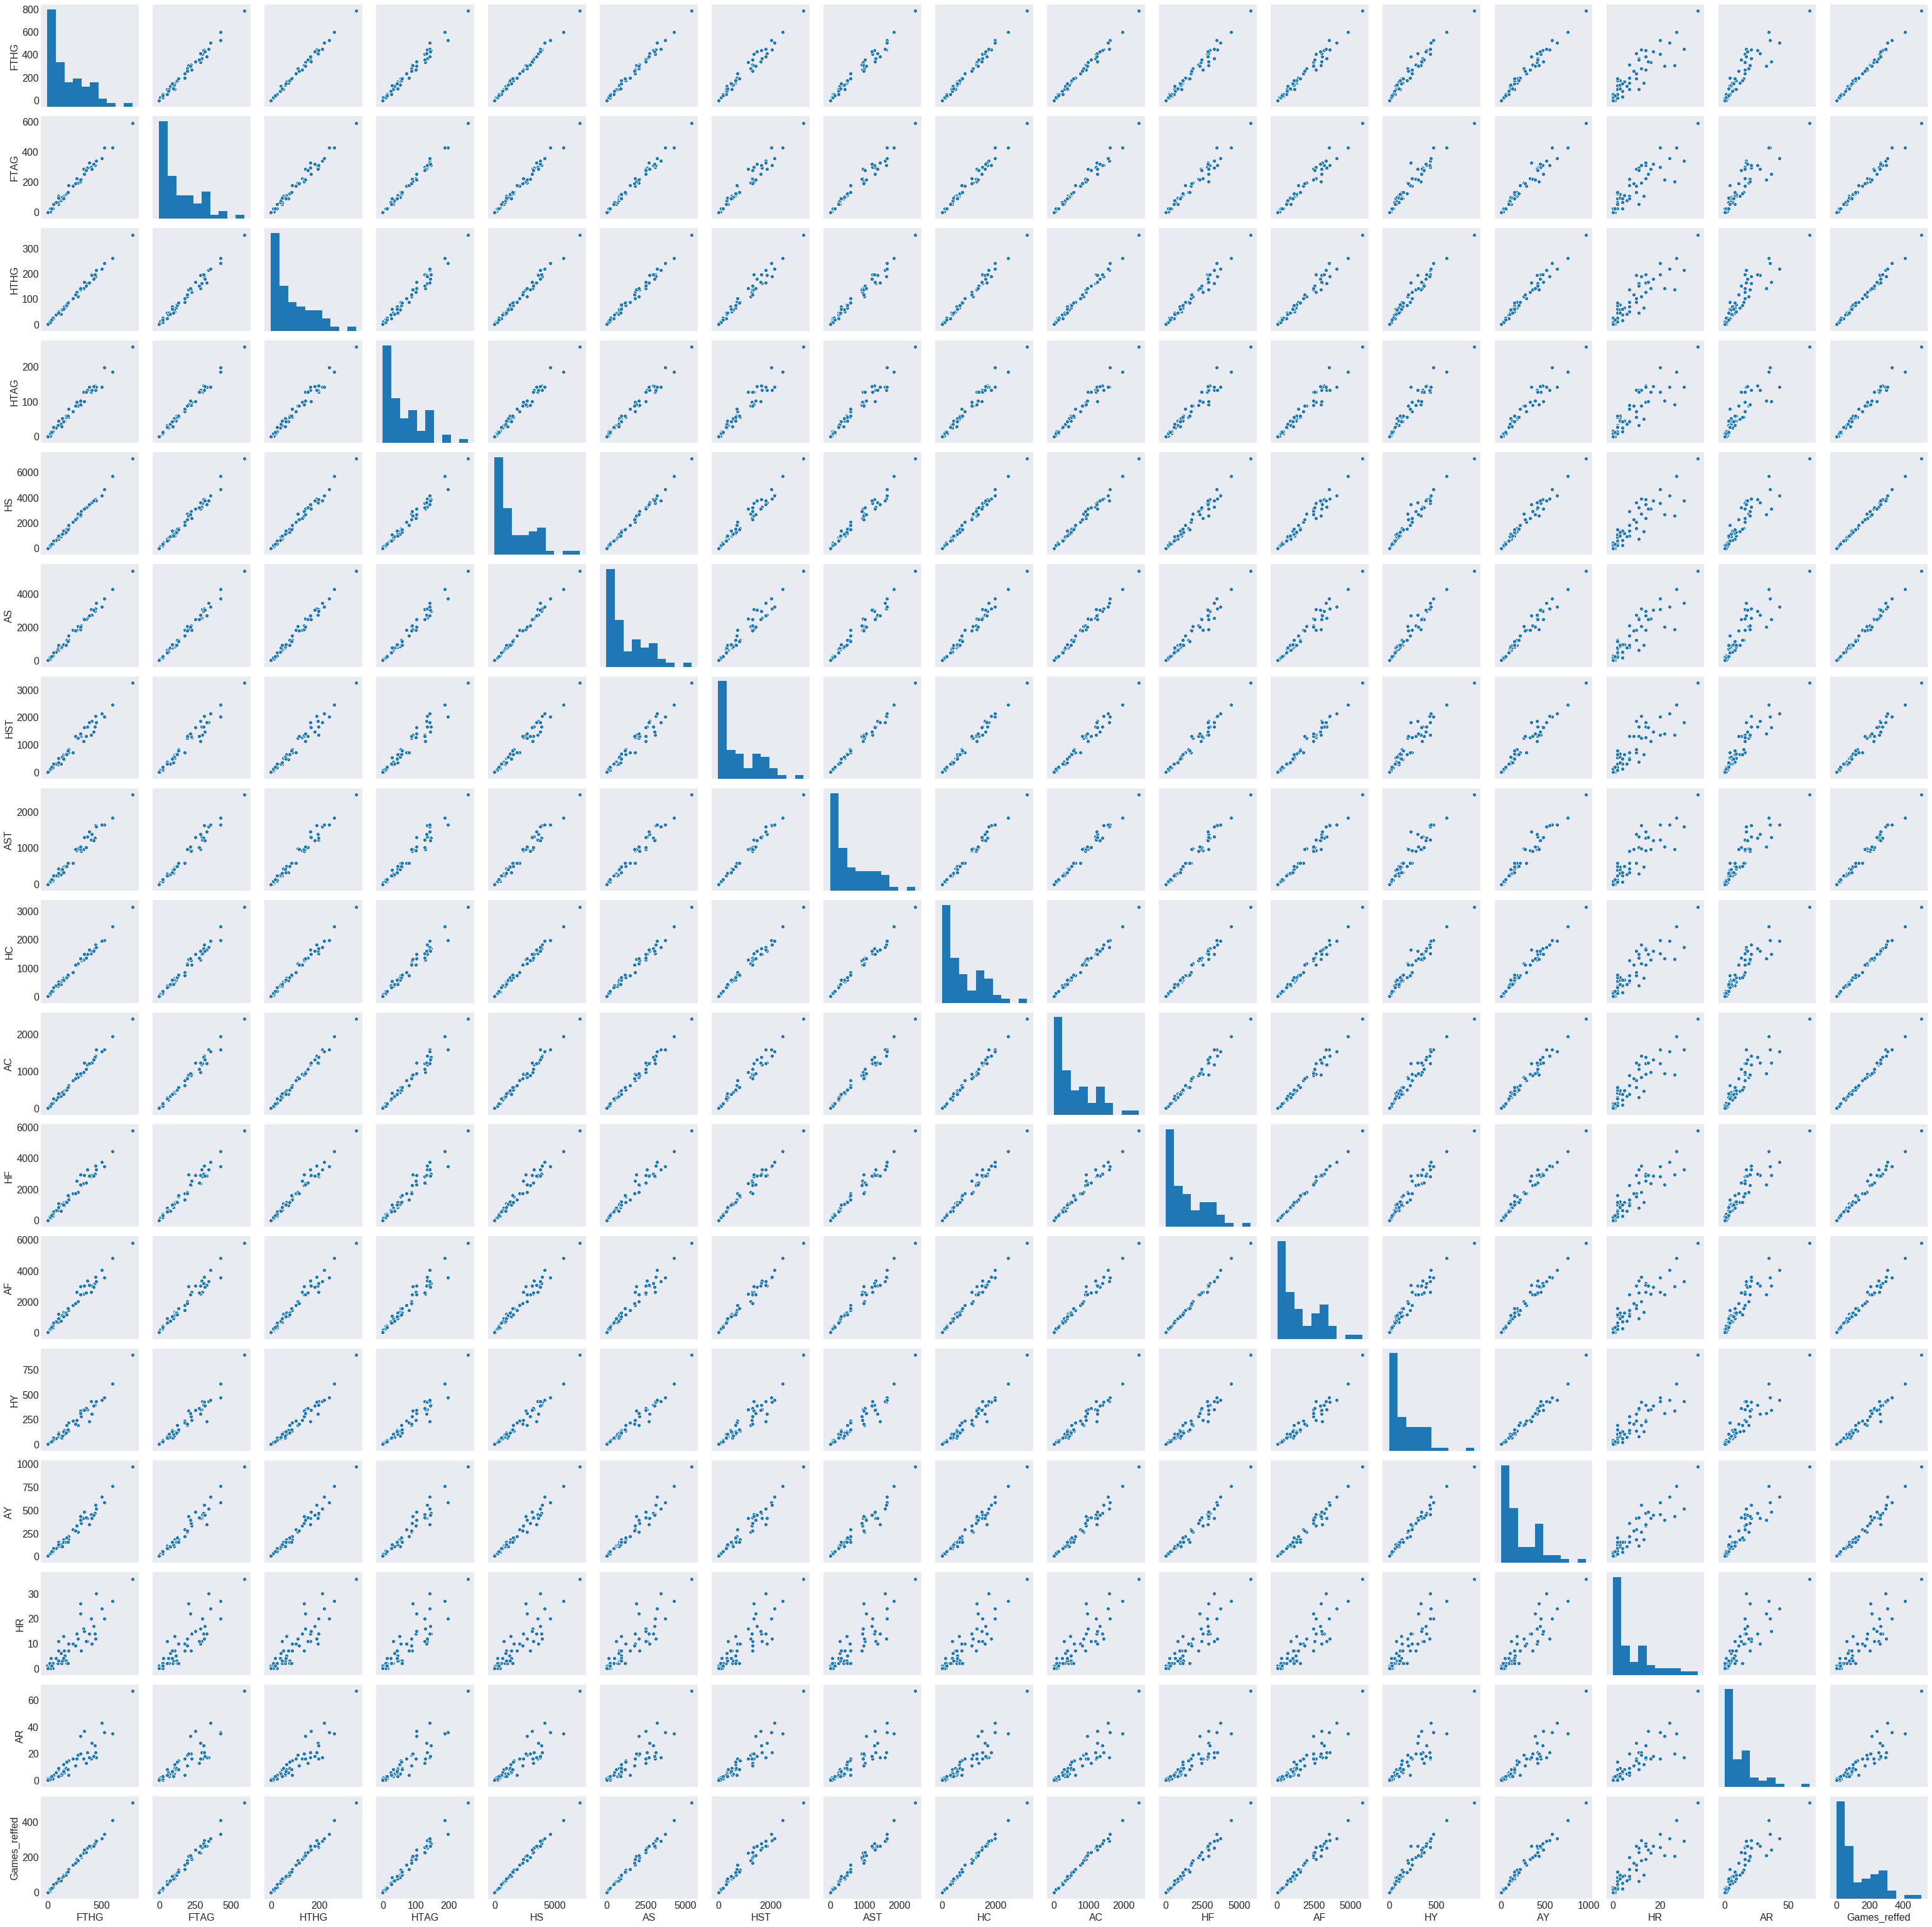

In [614]:
sns.pairplot(totrefs)

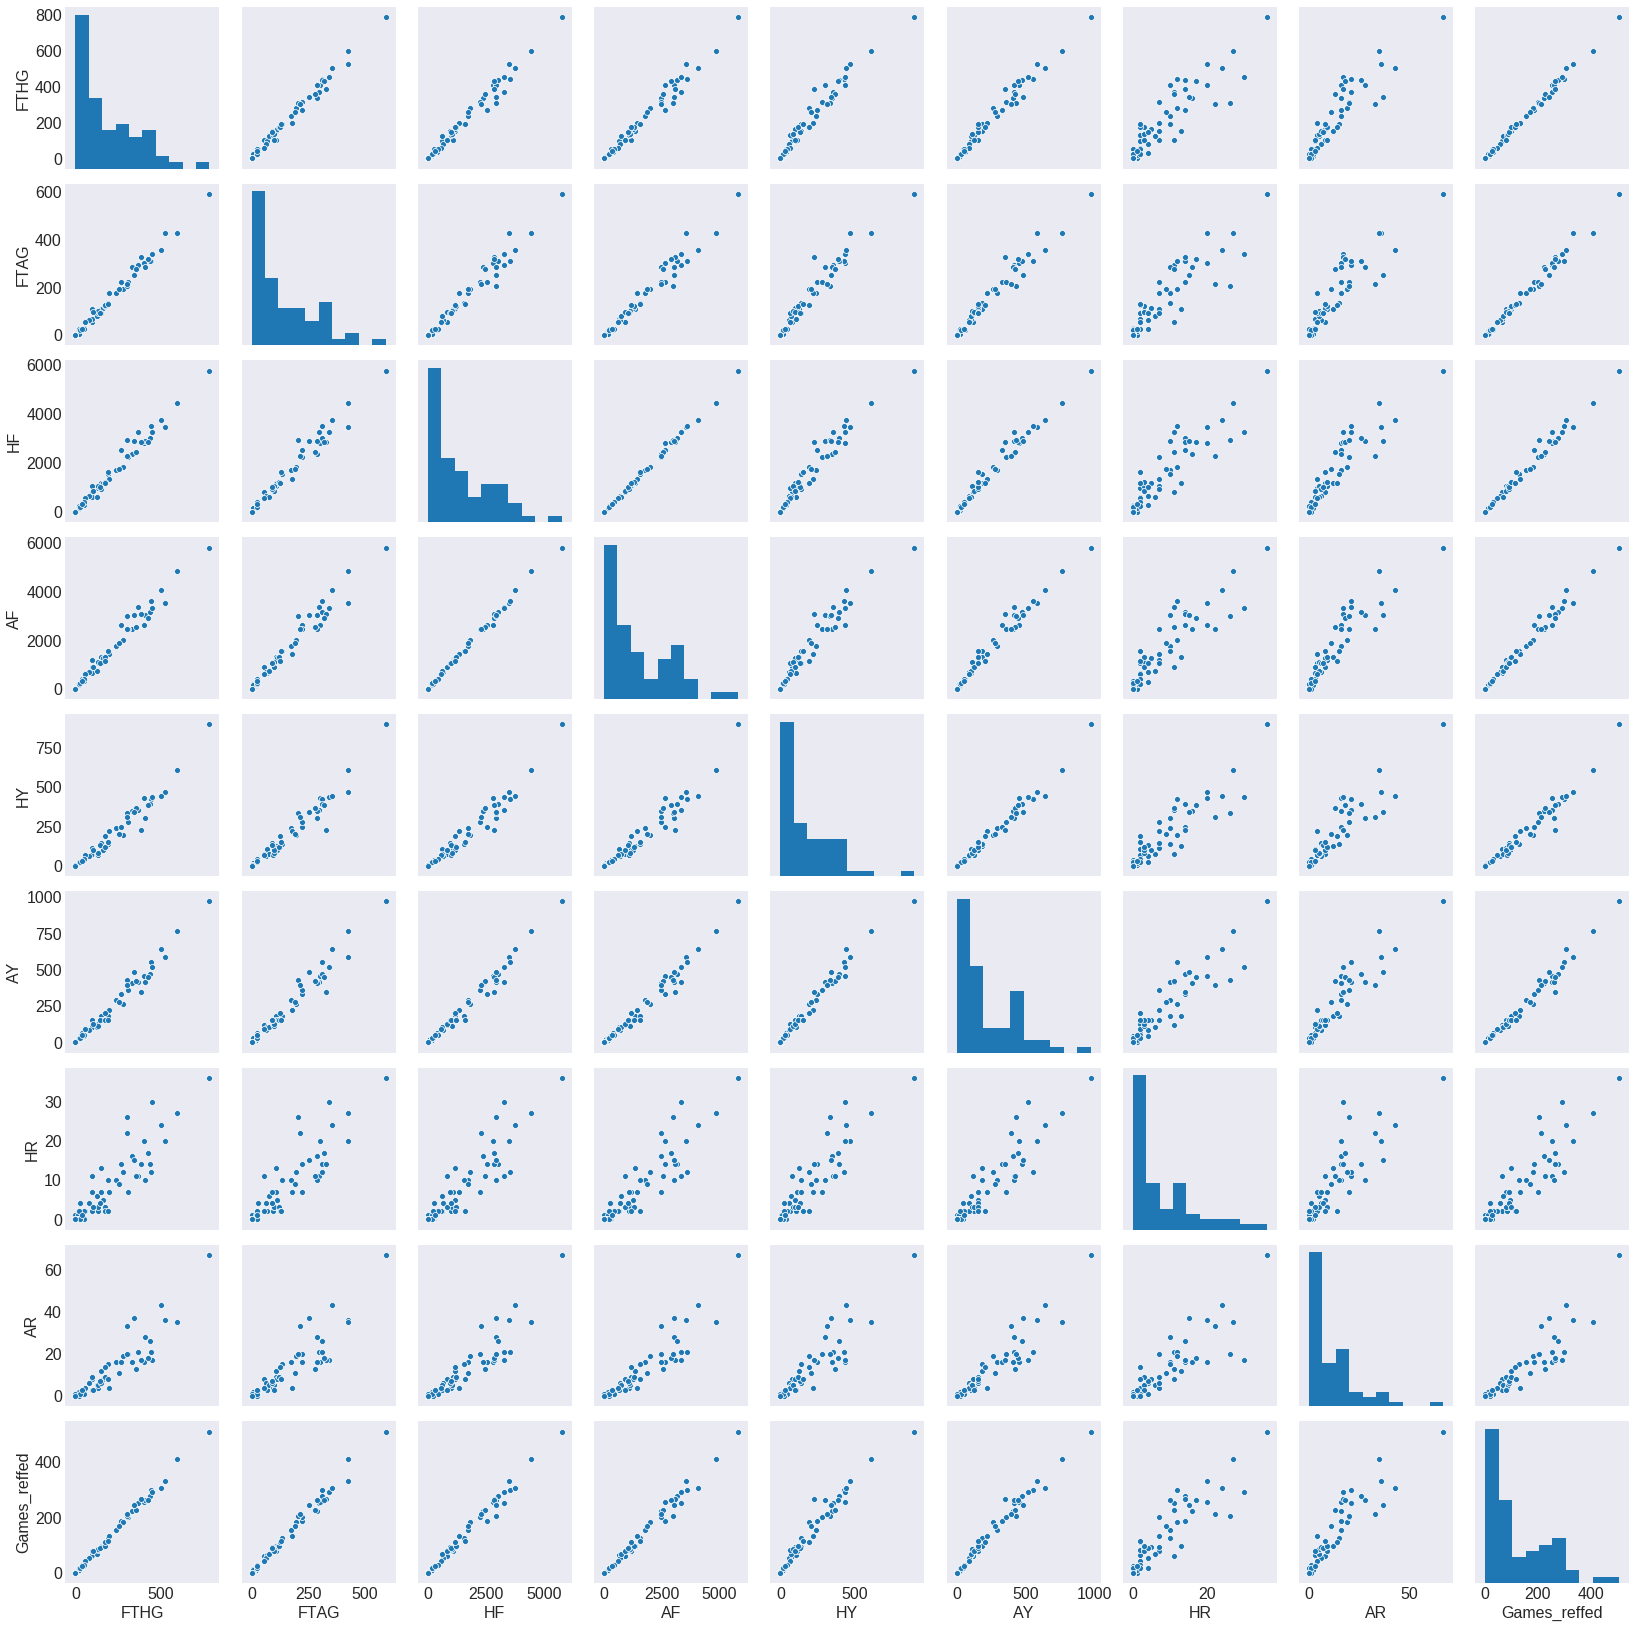

In [619]:
sns.pairplot(totrefs.iloc[:,[1,2,11,12,13,14,15,16,17]])

In [182]:
totrefs.Games_reffed.corr(totrefs.HY)

0.9802286404891573

In [183]:
totrefs.Games_reffed.corr(totrefs.AY)

0.9904783703158596

In [615]:
hycorrpears = stats.pearsonr(working_df.HY,working_df.AY)
hycorrpears

(0.19105794302355983, 3.7095552069689933e-63)

In [616]:
redcorrpears = stats.pearsonr(working_df.HR,working_df.AR)
redcorrpears

(0.0697498805894339, 1.2395857715661567e-09)

In [617]:
hycorrspearman = stats.spearmanr(working_df.HY,working_df.AY)
hycorrspearman

SpearmanrResult(correlation=0.19355738374447665, pvalue=8.379834647324734e-65)

In [618]:
redcorrspear = stats.spearmanr(working_df.HR,working_df.AR)
redcorrspear

SpearmanrResult(correlation=0.06652318569274071, pvalue=6.89914197979325e-09)

<Figure size 1440x576 with 0 Axes>

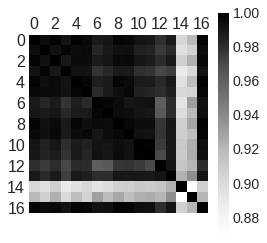

In [620]:
fig = plt.figure(figsize=(20,8))
plt.matshow(totrefs.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [279]:
len(working_df.Date)

7570

Null = Refs are not influenced by the crowd to favor the home team
Alternate = Fans have a significant impact on refereeing decisions

significance_level (alpha) = 0.2
bonferroni? there are 7570 games
z-test

In [621]:
home_yellow_mean = np.mean(working_df.HY)
away_yellow_mean = np.mean(working_df.AY)
home_red_mean = np.mean(working_df.HR)
away_red_mean = np.mean(working_df.AR)
print(home_yellow_mean,away_yellow_mean,home_red_mean,away_red_mean)

1.4029062087186261 1.7616908850726551 0.06393659180977543 0.09180977542932629


In [622]:
home_yellow_std = np.std(working_df.HY)
away_yellow_std = np.std(working_df.AY)
home_red_std = np.std(working_df.HR)
away_red_std = np.std(working_df.AR)
print(home_yellow_std,away_yellow_std,home_red_std,away_red_std)

1.188403681787516 1.2723090003717257 0.25572821643723576 0.30041631309337546


In [623]:
total_home_yellow = sum(working_df.HY)
total_away_yellow = sum(working_df.AY)
total_home_red = sum(working_df.HR)
total_away_red = sum(working_df.AR)
print(total_home_yellow,total_away_yellow,total_home_red,total_away_red)

10620.0 13336.0 484.0 695.0


In [624]:
(total_away_yellow - total_home_yellow) / len(working_df.Date)

0.35878467635402905

In [625]:
(total_away_red - total_home_red) / len(working_df.Date)

0.027873183619550858

In [626]:
aytohy_mean = np.mean(working_df.AY) - np.mean(working_df.HY)

In [627]:
statmodel.ztest(hnorm_yell.pdf(x),anorm_yell.pdf(x),ddof=7569)

(0.0033134485216764734, 0.9973562554191262)

In [628]:
statmodel.ztest(hnorm_yell.pdf(x),anorm_yell.pdf(x))

(0.28827002138585317, 0.7731400530429277)

In [629]:
statmodel.ztest(hnorm_red.pdf(x),anorm_red.pdf(x),ddof=7569)

(4.695139084964674e-13, 0.9999999999996254)

In [631]:
statmodel.ztest(hnorm_red.pdf(x),anorm_red.pdf(x))

(4.0847710039192654e-11, 0.9999999999674083)

In [632]:
hnorm_yell = stats.norm(home_yellow_mean,home_yellow_std)

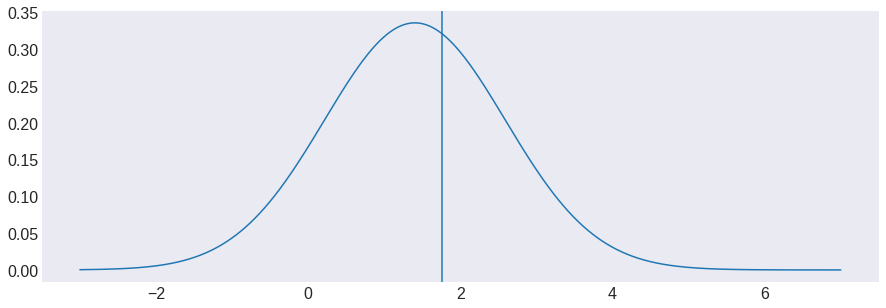

In [381]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x = np.linspace(-3,7,len(working_df.HY))
ax.plot(x,hnorm_yell.pdf(x))
ax.axvline(away_yellow_mean)
plt.show()

In [370]:
working_df.HR.astype(int)

0       0
1       0
2       1
3       0
4       0
       ..
7565    0
7566    0
7567    0
7568    0
7569    0
Name: HR, Length: 7570, dtype: int64

In [334]:
hnorm_red = stats.norm(home_red_mean,home_red_std)
hnorm_red.pdf(working_df.drop([7570,7585],axis=0,inplace=True))

1.5120208745467707

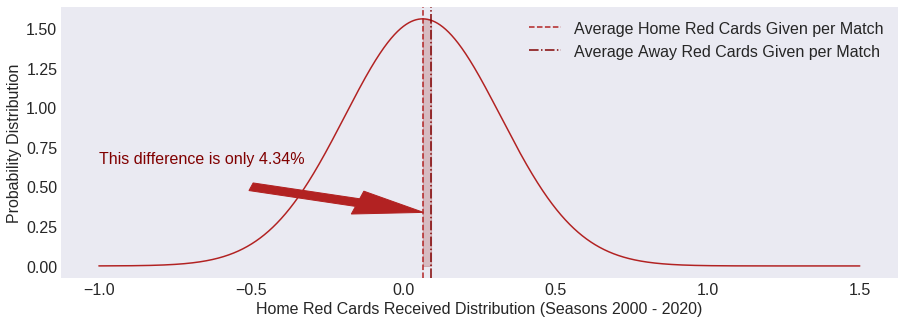

In [490]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

x = np.linspace(-1,1.5,len(working_df.HR))
ax.plot(x,hnorm_red.pdf(x),color='firebrick')
ax.axvline(home_red_mean,color='firebrick',linestyle='--',label='Average Home Red Cards Given per Match')
ax.axvline(away_red_mean,color='maroon',linestyle='-.',label='Average Away Red Cards Given per Match')
ax.set_xlabel('Home Red Cards Received Distribution (Seasons 2000 - 2020)')
ax.set_ylabel('Probability Distribution')
ax.fill_between(x, hnorm_red.pdf(x), 0, 
                   where=( (x <= away_red_mean) & (x>=home_red_mean)),
                   color="darkred", alpha=0.2)
ax.arrow(-0.5,0.5,0.35,-0.1,color='firebrick', width=0.05)
ax.text(-1,0.65,f'This difference is only {round(delta_red*100,3)}%',color='maroon')
plt.legend()
plt.savefig('/home/josh/Documents/dsi/caps/cap1/images/Home_red_normdist.jpeg')
plt.show()

In [407]:
delta_red = hnorm_red.cdf(away_red_mean) - hnorm_red.cdf(home_red_mean)
delta_red

0.043396906339586816

In [386]:
anorm_red = stats.norm(away_red_mean,away_red_std)

In [638]:
hnorm_yell = stats.norm(home_yellow_mean,home_yellow_std)

In [639]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
# plt.gca()
ax.set_facecolor('gainsboro')

x = np.linspace(-2,5,len(working_df.HY))
ax.plot(x,hnorm_yell.pdf(x),color='goldenrod')
ax.axvline(home_yellow_mean,color='gold',linestyle='--',label='Average Home Yellow Cards\n Given per Match')
ax.axvline(away_yellow_mean,color='darkgoldenrod',linestyle='--',label='Average Away Yellow Cards\n Given per Match')
hnorm_yell = stats.norm(home_yellow_mean,home_yellow_std)
yellow_mean,color='darkgoldenrod',linestyle='-.',label='Average Away Yellow Cards\n Given per Match')
ax.set_xlabel('Home Yellow Cards Received Distribution (Seasons 2000 - 2020)')
ax.set_ylabel('Probability Distribution')
ax.fill_between(x, hnorm_yell.pdf(x), 0, 
                   where=( (x <= away_yellow_mean) & (x>=home_yellow_mean)),
                   color="orange", alpha=0.2)
ax.arrow(3.5,0.15,-1.55,-0.05,color='darkgoldenrod', width=0.04)
ax.text(3.6,0.175,f'This is {round(delta_yell*100,3)}%',color='darkgoldenrod',fontsize=20)
plt.legend(loc='upper left')
plt.savefig('/home/josh/Documents/dsi/caps/cap1/images/Home_yellow_normdist.jpeg')
plt.show()

SyntaxError: invalid syntax (<ipython-input-639-53a764d081bf>, line 11)

In [457]:
delta_yell = hnorm_yell.cdf(away_yellow_mean) - hnorm_yell.cdf(home_yellow_mean)
delta_yell

0.11863764981537173